# Assignment 1 Amazon Review Dataset

7130ICT - Data Analytics

Trimester 1 - 2021

s5172620 - Julio Pimentel Albores

s5198626 - Gabriela Almeida Monteiro

Due: Friday, 28 May 2021

## Table of contents
* [Part 1 –Basic analysis](#part1)

    * [1.1) Exploring electronics dataset](#part1.1)
        * [1.1.1) Data cleaning](#part1.1.1)
        * [1.1.2) Creation of Tablet dataset](#part1.1.2)
    * [1.2) Exploring Tablet dataset](#part1.2)
        * [1.2.1) Filtering accessories](#part1.2.1)
        * [1.2.2) Data cleaning of Tablet dataset](#part1.2.2)
        * [1.2.3) Descriptive statistics of Tablet dataset](#part1.2.3)
    * [1.3) Hypotesis](#part1.3)
* [Part 2 – Advanced Analysis](#part2)
    * [2.1) Exploratory Analysis](#part2.1)
        * [2.1.1) Brand Analysis](#part2.1.1)
        * [2.1.2) Product Analysis](#part2.1.2)
        * [2.1.3) Feature Correlation Analysis](#part2.1.3)
    * [2.2) Sentiment Analysis](#part2.2)
        * [2.2.1) Sentiment analysis across time](#part2.2.1)
        * [2.2.2) BTF-IDF analysis for all dataset](#part2.2.2)
        * [2.2.3) TF-IDF analysis for positive sentiment](#part2.2.3)
        * [2.2.4) TF-IDF analysis for negative sentiment](#part2.2.4)
    * [2.3) Time Series Analysis](#part2.3)
        * [2.3.1) Cyclical events](#part2.3.1)
    
  
  The files 'reviews_Electronics_5.json.gz' and 'meta_Electronics.json.gz' are required to start the code from part 1.1. The file 'assignment_tablet_data.pkl' is required to start the code from part 1.2.

## Part 1 –Basic analysis  <a class="anchor" id="part1"></a>

## 1.1) Exploring electronics dataset <a class="anchor" id="part1.1"></a>

In [2]:
#import libraries
import pandas as pd
import gzip

In [3]:
#Amazon Review Dataset
#Electronics category

#Pandas data frame
#These functions read the data into a pandas data frame (http://jmcauley.ucsd.edu/data/amazon/)
    
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

reviews_df = getDF('reviews_Electronics_5.json.gz')

reviews_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [4]:
# We are going to use only reviewerID for review references.

print("The shape of the dataset is {:,} rows and {} columns".format(reviews_df.shape[0],reviews_df.shape[1]))
print("The oldest post is from:", reviews_df['reviewTime'].min())
print("The newest post is from:", reviews_df['reviewTime'].max())
print("There are {:,} unique users ID who left a review.".format(reviews_df['reviewerID'].nunique()))
print("There are {:,} unique users Names who left a review.".format(reviews_df['reviewerName'].nunique()))
print("There are {:,} unique items.".format(reviews_df['asin'].nunique()))
print("The average rating given by customers is {:.2f}".format(reviews_df['overall'].mean()))

The shape of the dataset is 1,689,188 rows and 9 columns
The oldest post is from: 01 1, 2000
The newest post is from: 12 9, 2013
There are 192,403 unique users ID who left a review.
There are 162,859 unique users Names who left a review.
There are 63,001 unique items.
The average rating given by customers is 4.22


In [5]:
#statistical information of float/int columns
#overall values are between 1 and 5 with a mean of 4.22
#unixReviewTime is an int value of date time. It needs to be transformed.

reviews_df.describe()

,overall,unixReviewTime
count,1.689188e+06,1.689188e+06
mean,4.222779e+00,1.340571e+09
std,1.185632e+00,6.342451e+07
min,1.000000e+00,9.292320e+08
25%,4.000000e+00,1.318118e+09
50%,5.000000e+00,1.360800e+09
75%,5.000000e+00,1.385078e+09
max,5.000000e+00,1.406074e+09


In [6]:
#most of the attributes types are object. However, overall and unixReviewTime have a numerical structure. 

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   reviewerID      1689188 non-null  object 
 1   asin            1689188 non-null  object 
 2   reviewerName    1664458 non-null  object 
 3   helpful         1689188 non-null  object 
 4   reviewText      1689188 non-null  object 
 5   overall         1689188 non-null  float64
 6   summary         1689188 non-null  object 
 7   unixReviewTime  1689188 non-null  int64  
 8   reviewTime      1689188 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 128.9+ MB


In [7]:
# As seen above, the column reviewerName has some null-values which can be confirmed by: 
reviews_df['reviewerName'].isna().sum()

24730

In [8]:
#check the column "timeFormat" makes sense with the column "reviewTime"
reviews_df.head()

#the most relevant attributes are: reviewerID, reviewerName, overall, and timeFormat
#reviewText and summary have interesting information but it is unstructured
#the hypothesis is that we can predict the rating of a product based on item or user approach

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [9]:
# Now, we will look at the electronics metadata
metadata_df = getDF('meta_Electronics.json.gz')

metadata_df.head()

,asin,imUrl,description,categories,title,price,salesRank,related,brand
0,0132793040,http://ecx.images-amazon.com/images/I/31JIPhp%...,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,0321732944,http://ecx.images-amazon.com/images/I/31uogm6Y...,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
2,0439886341,http://ecx.images-amazon.com/images/I/51k0qa8f...,Digital Organizer and Messenger,"[[Electronics, Computers & Accessories, PDAs, ...",Digital Organizer and Messenger,8.15,{'Electronics': 144944},"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,0511189877,http://ecx.images-amazon.com/images/I/41HaAhbv...,The CLIKR-5 UR5U-8780L remote control is desig...,"[[Electronics, Accessories & Supplies, Audio &...",CLIKR-5 Time Warner Cable Remote Control UR5U-...,23.36,NaN,"{'also_viewed': ['B001KC08A4', 'B00KUL8O0W', '...",NaN
4,0528881469,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [10]:
metadata_df.shape

(498196, 9)

In [11]:
# we will merge both dataframes using the product ID (asin) as a unifier.
# we will save the merged dataframe in a new variable called df
df_electronics = pd.merge(reviews_df, metadata_df, how='inner', on='asin')

In [12]:
df_electronics.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [13]:
# As expected, the merged dataframe has the same number of rows, but has 18 columns.

df_electronics.shape

(1689188, 17)

In [14]:
df_electronics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689188 entries, 0 to 1689187
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   reviewerID      1689188 non-null  object 
 1   asin            1689188 non-null  object 
 2   reviewerName    1664458 non-null  object 
 3   helpful         1689188 non-null  object 
 4   reviewText      1689188 non-null  object 
 5   overall         1689188 non-null  float64
 6   summary         1689188 non-null  object 
 7   unixReviewTime  1689188 non-null  int64  
 8   reviewTime      1689188 non-null  object 
 9   imUrl           1687975 non-null  object 
 10  description     1655511 non-null  object 
 11  categories      1689188 non-null  object 
 12  title           1643686 non-null  object 
 13  price           1639882 non-null  float64
 14  salesRank       810070 non-null   object 
 15  related         1662142 non-null  object 
 16  brand           954251 non-null   ob

### 1.1.1) Data cleaning <a class="anchor" id="part1.1.1"></a>

In [15]:
#new attribute created with datetime format
df_electronics["timeFormat"] = pd.to_datetime(df_electronics["unixReviewTime"], unit='s')

In [16]:
# source: https://datatofish.com/count-nan-pandas-dataframe/
# There are 45502 product titles that are null-values, as confirmed by:
df_electronics['title'].isna().sum()

45502

In [17]:
# Instead of dropping the observations that are null, we will reasign the dataframe with all rows that do not have
# null values in the column 'title':
# source: https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/#:~:text=To%20drop%20a%20specific%20row,to%20the%20Pandas%20drop%20function.&text=%23%20delete%20a%20few%20specified%20rows,always%20align%20to%20row%20numbers.&text=It%20can%20be%20useful%20for,have%20a%20more%20meaningful%20index.
df_electronics = df_electronics.loc[df_electronics['title'].isna() != True]

In [18]:
# Now, if we check the dataframe again, we will see that, as expected, there are no more null values in the column title.
df_electronics['title'].isna().sum()

0

In [19]:
df_electronics.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand,timeFormat
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN,2013-06-02
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN,2010-11-25
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN,2010-09-09
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN,2010-11-24
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN,2011-09-29


### 1.1.2) Creation of Tablet dataset <a class="anchor" id="part1.1.2"></a>

In [20]:
#There are 81,453 products related to "ipad"
df_electronics[df_electronics['title'].str.contains("ipad")].shape

(578, 18)

In [21]:
#however, only 15,871 of 81,453 (19%) are related to "tablet" as well. 
ipad=df_electronics[df_electronics['title'].str.contains("ipad")]

ipad[ipad['title'].str.contains("tablet")].shape

(62, 18)

In [22]:
#We transform the 'title' column in lower case. 
df_electronics['title']=df_electronics['title'].str.lower()

# Now we want to filter out the observations containing the keywords: 'tablet' and "ipad"
df_tablet = df_electronics[df_electronics['title'].str.contains("tablet") | df_electronics['title'].str.contains("ipad")]

#We can use the file assignment_tablet_data.pkl to avoid loading the whole electronics dataset
df_tablet.to_pickle('assignment_tablet_data.pkl')

## 1.2) Exploring Tablet dataset <a class="anchor" id="part1.2"></a>

For this section, we would only require the pkl file, rather than ratings and metadata datasets. 

In [2]:
import pandas as pd
import numpy as np

#read pkl file of tablet and ipad items. 
df_all = pd.read_pickle('assignment_tablet_data.pkl')

df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135939 entries, 237 to 1689141
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   reviewerID      135939 non-null  object        
 1   asin            135939 non-null  object        
 2   reviewerName    134726 non-null  object        
 3   helpful         135939 non-null  object        
 4   reviewText      135939 non-null  object        
 5   overall         135939 non-null  float64       
 6   summary         135939 non-null  object        
 7   unixReviewTime  135939 non-null  int64         
 8   reviewTime      135939 non-null  object        
 9   imUrl           135939 non-null  object        
 10  description     131393 non-null  object        
 11  categories      135939 non-null  object        
 12  title           135939 non-null  object        
 13  price           134910 non-null  float64       
 14  salesRank       46938 non-null   

In [3]:
df_all.describe()

,overall,unixReviewTime,price
count,135939.000000,1.359390e+05,134910.000000
mean,4.190247,1.366043e+09,45.278070
std,1.170919,3.096553e+07,81.089161
min,1.000000,1.010966e+09,0.010000
25%,4.000000,1.352506e+09,9.950000
50%,5.000000,1.371773e+09,17.990000
75%,5.000000,1.389658e+09,38.440000
max,5.000000,1.406074e+09,850.000000


### 1.2.1) Filtering accessories <a class="anchor" id="part1.2.1"></a>

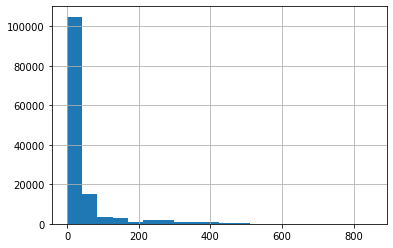

In [4]:
#Maybe filter above $100? 
df_all["price"].hist(bins=20)

In [5]:
# We can see that there are items which have a very low price and probably are accessories. So we have to get hid of
# them for our analysis, which will mainly focus on tablets and not it's accessories. 
# After checking the amazon website, it was noticed that the prices lower than 250 are include lots of accessories. 
# Therefore, this will be out cut line.

# Here we filter only the reviews for products costing more than 250 and reasign our variable df_tablet with these observations.

df_tab = df_all[df_all['price']>100]

df_tab.describe()

,overall,unixReviewTime,price
count,12611.000000,1.261100e+04,12611.000000
mean,4.103481,1.360861e+09,260.236671
std,1.250153,3.760017e+07,123.999280
min,1.000000,1.122941e+09,100.460000
25%,4.000000,1.340755e+09,154.950000
50%,5.000000,1.370909e+09,231.150000
75%,5.000000,1.388534e+09,312.360000
max,5.000000,1.406074e+09,850.000000


In [6]:
print("The shape of the dataset is {:,} rows and {} columns".format(df_tab.shape[0],df_tab.shape[1]))
# print("The oldest post is from:", df_tab['reviewTime'].min()) --> output: The oldest post is from: 01 1, 2008
# print("The newest post is from:", df_tab['reviewTime'].max()) --> output: The newest post is from: 12 9, 2013
print("The oldest post is from: {0:%d/%m/%y}".format(df_tab['timeFormat'].min()))
print("The newest post is from: {0:%d/%m/%y}".format(df_tab['timeFormat'].max()))
print("There are {:,} unique users ID who left a review.".format(df_tab['reviewerID'].nunique()))
print("There are {:,} unique users Names who left a review.".format(df_tab['reviewerName'].nunique()))
print("The average rating given by customers is {:.2f}".format(df_tab['overall'].mean()))

The shape of the dataset is 12,611 rows and 18 columns
The oldest post is from: 02/08/05
The newest post is from: 23/07/14
There are 10,959 unique users ID who left a review.
There are 10,074 unique users Names who left a review.
The average rating given by customers is 4.10


### 1.2.2) Data cleaning of tablet dataset <a class="anchor" id="part1.2.2"></a>

In [7]:
# We can see that there are 2738 non null values for brand (out of 4180 observations). 
df_tab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12611 entries, 237 to 1688828
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   reviewerID      12611 non-null  object        
 1   asin            12611 non-null  object        
 2   reviewerName    12568 non-null  object        
 3   helpful         12611 non-null  object        
 4   reviewText      12611 non-null  object        
 5   overall         12611 non-null  float64       
 6   summary         12611 non-null  object        
 7   unixReviewTime  12611 non-null  int64         
 8   reviewTime      12611 non-null  object        
 9   imUrl           12611 non-null  object        
 10  description     12566 non-null  object        
 11  categories      12611 non-null  object        
 12  title           12611 non-null  object        
 13  price           12611 non-null  float64       
 14  salesRank       4407 non-null   object        
 15

In [8]:
# In order to solve this problem we will fill in the blank cells from the brand using the 
# first words from the title of the product, which we can see below:
df_tab.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand,timeFormat
237,A3LDPF5FMB782Z,1400501466,Alan Houston,"[3, 4]","The Nook Tablet, in both the 16gb version and ...",5.0,The BEST Color E-Reader - With Bonus Features,1336003200,"05 3, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",NaN,2012-05-03
238,A9HYSJ3D0D6I2,1400501466,Al,"[1, 2]","I saw this product on Amazon and thought ""what...",3.0,possible lemon,1336435200,"05 8, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",NaN,2012-05-08
239,A3EOHF2YSVZA9L,1400501466,Amazon Customer,"[1, 1]",Now I have like four different kendels and I a...,5.0,Loved it,1376524800,"08 15, 2013",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",NaN,2013-08-15
240,ASH6NHZ1Z2O51,1400501466,Amazon Customer,"[1, 1]","this is excellent tablet, excellent touch scre...",5.0,"Excellent tablet, great performance",1329264000,"02 15, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",NaN,2012-02-15
241,A3R2US71Y3CV9R,1400501466,"Amazon Customer ""pkchainsaw""","[0, 1]","I love nooks. Kindle fire is OK, but nooks are...",5.0,love the nook,1390780800,"01 27, 2014",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",NaN,2014-01-27


In [9]:
def generate_brand(product_title):
    """
    Takes the title of the product in the title column and uses the
    first word in order to populate the null cells in the 'brand' column.
    """
    generated_brand = product_title.split()[0].capitalize()
    return generated_brand


# Now, we can use the pandas apply function to apply to generate values to the newly created  column.    
df_tab['brand'].fillna(value=df_tab['title'].apply(generate_brand), inplace=True)



df_tab.head()

/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand,timeFormat
237,A3LDPF5FMB782Z,1400501466,Alan Houston,"[3, 4]","The Nook Tablet, in both the 16gb version and ...",5.0,The BEST Color E-Reader - With Bonus Features,1336003200,"05 3, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-05-03
238,A9HYSJ3D0D6I2,1400501466,Al,"[1, 2]","I saw this product on Amazon and thought ""what...",3.0,possible lemon,1336435200,"05 8, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-05-08
239,A3EOHF2YSVZA9L,1400501466,Amazon Customer,"[1, 1]",Now I have like four different kendels and I a...,5.0,Loved it,1376524800,"08 15, 2013",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2013-08-15
240,ASH6NHZ1Z2O51,1400501466,Amazon Customer,"[1, 1]","this is excellent tablet, excellent touch scre...",5.0,"Excellent tablet, great performance",1329264000,"02 15, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-02-15
241,A3R2US71Y3CV9R,1400501466,"Amazon Customer ""pkchainsaw""","[0, 1]","I love nooks. Kindle fire is OK, but nooks are...",5.0,love the nook,1390780800,"01 27, 2014",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2014-01-27


In [10]:
'''JULIO HAVE A LOOK AT THIS PART OF THE CODE WHERE I DROP THE DUPLICATES AND THE ROWS WITH NULL VALUES FOR PRICE,
DESCRIPTION AND RELATED'''

# # Now we will drop duplicates based on specific columns: reviewerName, unixReviewTime, asin. And we will keep the last
# # occurence.
# df.drop_duplicates(subset=['reviewerName', 'unixReviewTime', 'asin'], keep='last', inplace=True)

# # Drop all observations that have null values in the columns "“reviewerName”,”price”,”description”,”related”"
# df.dropna(subset=['price', 'description', 'related'], inplace=True)

'JULIO HAVE A LOOK AT THIS PART OF THE CODE WHERE I DROP THE DUPLICATES AND THE ROWS WITH NULL VALUES FOR PRICE,\nDESCRIPTION AND RELATED'

In [11]:
# Amazon's ratings score scale range from 1 to 5, being:
# 1 = "I hate it" 
# 2 = "I don't like it"
# 3 = "It's okay"
# 4 = "I like it"
# 5 = "I love it!" 

#Transform overall score above 3 as positive, and below 3 as negative
df_tab["sentiment"]=np.where(df_tab["overall"]>3,1,0)
df_tab.head()

/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand,timeFormat,sentiment
237,A3LDPF5FMB782Z,1400501466,Alan Houston,"[3, 4]","The Nook Tablet, in both the 16gb version and ...",5.0,The BEST Color E-Reader - With Bonus Features,1336003200,"05 3, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-05-03,1
238,A9HYSJ3D0D6I2,1400501466,Al,"[1, 2]","I saw this product on Amazon and thought ""what...",3.0,possible lemon,1336435200,"05 8, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-05-08,0
239,A3EOHF2YSVZA9L,1400501466,Amazon Customer,"[1, 1]",Now I have like four different kendels and I a...,5.0,Loved it,1376524800,"08 15, 2013",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2013-08-15,1
240,ASH6NHZ1Z2O51,1400501466,Amazon Customer,"[1, 1]","this is excellent tablet, excellent touch scre...",5.0,"Excellent tablet, great performance",1329264000,"02 15, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-02-15,1
241,A3R2US71Y3CV9R,1400501466,"Amazon Customer ""pkchainsaw""","[0, 1]","I love nooks. Kindle fire is OK, but nooks are...",5.0,love the nook,1390780800,"01 27, 2014",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2014-01-27,1


In [12]:
#Transform the list within "helpful" column in a ratio
lst_help=[]
for i in df_tab["helpful"]:
    #if there is no data, use nan value to avoid division by 0
    if i[1]==0:
        lst_help.append(np.nan)
    else:
        lst_help.append(i[0]/i[1])
#add the list in a new column         
df_tab["helpfulRatio"]=lst_help

df_tab.head()



/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand,timeFormat,sentiment,helpfulRatio
237,A3LDPF5FMB782Z,1400501466,Alan Houston,"[3, 4]","The Nook Tablet, in both the 16gb version and ...",5.0,The BEST Color E-Reader - With Bonus Features,1336003200,"05 3, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-05-03,1,0.75
238,A9HYSJ3D0D6I2,1400501466,Al,"[1, 2]","I saw this product on Amazon and thought ""what...",3.0,possible lemon,1336435200,"05 8, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-05-08,0,0.50
239,A3EOHF2YSVZA9L,1400501466,Amazon Customer,"[1, 1]",Now I have like four different kendels and I a...,5.0,Loved it,1376524800,"08 15, 2013",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2013-08-15,1,1.00
240,ASH6NHZ1Z2O51,1400501466,Amazon Customer,"[1, 1]","this is excellent tablet, excellent touch scre...",5.0,"Excellent tablet, great performance",1329264000,"02 15, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-02-15,1,1.00
241,A3R2US71Y3CV9R,1400501466,"Amazon Customer ""pkchainsaw""","[0, 1]","I love nooks. Kindle fire is OK, but nooks are...",5.0,love the nook,1390780800,"01 27, 2014",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2014-01-27,1,0.00


In [13]:
#Plot a timeseries of the frequency of reviews

#Group by timeFormat column
#Apply -> sentiment: mean and count; overall: mean
df_tab_time=df_tab.groupby("timeFormat").agg({"sentiment":["mean","count"], "overall":"mean"})
#Drop one level of column names
df_tab_time.columns = df_tab_time.columns.droplevel()

#find min and max datetime
min_date=min(df_tab_time.index)
max_date=max(df_tab_time.index)

#reindex the series and filling missing dates with np.nan
df_tab_time=df_tab_time.reindex(pd.date_range( min_date, max_date), fill_value=np.nan)

#renaming the columns
df_tab_time.columns=["s_mean","s_count","o_mean"]

#Sampling the values into months
#Apply the same criteria for the functions
df_tab_time=df_tab_time.resample("M").agg({"s_mean":"mean","s_count":"sum","o_mean":"mean"})
df_tab_time.head(5)

,s_mean,s_count,o_mean
2005-08-31,1.0,2.0,4.5
2005-09-30,NaN,0.0,NaN
2005-10-31,1.0,1.0,5.0
2005-11-30,NaN,0.0,NaN
2005-12-31,1.0,1.0,4.0


In [14]:
'''JULIO SEE THIS PART'''
# #Including a month-year column 
# df_tab["month_year"]=df_tab["timeFormat"].dt.to_period("M")
# #unixReviewTime shows the same hour
# df_tab["hour"]=df_tab["timeFormat"].dt.hour
# df_tab["day_week"]=df_tab["timeFormat"].dt.dayofweek
# df_tab["day_month"]=df_tab["timeFormat"].dt.day
# df_tab.head()

# #It will not be possible to make an analysis for hourly purchases, only with days
# print("There are",df_tab["month_year"].nunique(),"unique month_year")
# print("There are",df_tab["hour"].nunique(),"unique hours")
# print("There are",df_tab["day_week"].nunique(),"unique days of the week")
# print("There are",df_tab["day_month"].nunique(),"unique days of the month")

#Including a month-year column 
df_tab["month_year"]=df_tab["timeFormat"].dt.to_period("M")
df_tab.head()

/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,imUrl,...,categories,title,price,salesRank,related,brand,timeFormat,sentiment,helpfulRatio,month_year
237,A3LDPF5FMB782Z,1400501466,Alan Houston,"[3, 4]","The Nook Tablet, in both the 16gb version and ...",5.0,The BEST Color E-Reader - With Bonus Features,1336003200,"05 3, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,...,"[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-05-03,1,0.75,2012-05
238,A9HYSJ3D0D6I2,1400501466,Al,"[1, 2]","I saw this product on Amazon and thought ""what...",3.0,possible lemon,1336435200,"05 8, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,...,"[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-05-08,0,0.50,2012-05
239,A3EOHF2YSVZA9L,1400501466,Amazon Customer,"[1, 1]",Now I have like four different kendels and I a...,5.0,Loved it,1376524800,"08 15, 2013",http://ecx.images-amazon.com/images/I/41StLxJb...,...,"[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2013-08-15,1,1.00,2013-08
240,ASH6NHZ1Z2O51,1400501466,Amazon Customer,"[1, 1]","this is excellent tablet, excellent touch scre...",5.0,"Excellent tablet, great performance",1329264000,"02 15, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,...,"[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-02-15,1,1.00,2012-02
241,A3R2US71Y3CV9R,1400501466,"Amazon Customer ""pkchainsaw""","[0, 1]","I love nooks. Kindle fire is OK, but nooks are...",5.0,love the nook,1390780800,"01 27, 2014",http://ecx.images-amazon.com/images/I/41StLxJb...,...,"[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2014-01-27,1,0.00,2014-01


In [15]:
#Drop all columns that will not be used on the analysis

df_tab=df_tab.drop(columns=["reviewerName","helpful","unixReviewTime","reviewTime","imUrl"])
df_tab.head()

,reviewerID,asin,reviewText,overall,summary,description,categories,title,price,salesRank,related,brand,timeFormat,sentiment,helpfulRatio,month_year
237,A3LDPF5FMB782Z,1400501466,"The Nook Tablet, in both the 16gb version and ...",5.0,The BEST Color E-Reader - With Bonus Features,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-05-03,1,0.75,2012-05
238,A9HYSJ3D0D6I2,1400501466,"I saw this product on Amazon and thought ""what...",3.0,possible lemon,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-05-08,0,0.50,2012-05
239,A3EOHF2YSVZA9L,1400501466,Now I have like four different kendels and I a...,5.0,Loved it,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2013-08-15,1,1.00,2013-08
240,ASH6NHZ1Z2O51,1400501466,"this is excellent tablet, excellent touch scre...",5.0,"Excellent tablet, great performance","Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-02-15,1,1.00,2012-02
241,A3R2US71Y3CV9R,1400501466,"I love nooks. Kindle fire is OK, but nooks are...",5.0,love the nook,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2014-01-27,1,0.00,2014-01


### 1.2.3) Descriptive statistics of Tablet dataset <a class="anchor" id="part1.2.3"></a>

In [16]:
# Descriptive statistics

# Now that we finished cleaning our dataset, let's have a look at it.

print("================ Descriptive Statistics ================")
print()
print("The shape of the dataset is {:,} rows and {} columns.".format(df_tab.shape[0],df_tab.shape[1]))
print("The oldest post is from: {:%d/%m/%y}".format(df_tab['timeFormat'].min()))
print("The newest post is from: {:%d/%m/%y}".format( df_tab['timeFormat'].max()))
print("There are {:,} unique users ID who left a review.".format(df_tab['reviewerID'].nunique()))
print("There are {:,} unique products.".format(df_tab['title'].nunique()))
print("There are {:,} unique brands.".format(df_tab['brand'].nunique()))
print("There are {:,} good reviews.".format((df_tab['sentiment']==1).sum()))
print("There are {:,} bad reviews.".format((df_tab['sentiment']==0).sum()))
print("The average rating given by customers is {:.2f}.".format(df_tab['overall'].mean()))

================ Descriptive Statistics ================

The shape of the dataset is 12,611 rows and 16 columns.
The oldest post is from: 02/08/05
The newest post is from: 23/07/14
There are 10,959 unique users ID who left a review.
There are 322 unique products.
There are 131 unique brands.
There are 9,688 good reviews.
There are 2,923 bad reviews.
The average rating given by customers is 4.10.


## 1.3) Hypothesis <a class="anchor" id="part1.3"></a>

In [17]:
# Hypothesis

# Assess their popularity with the customers - which product is more popular

# How have large events in society affected the number of reviews or the reviews' sentiment? - large events in society affects the purchasing behaviour of customers and its review. large event = define us events - us elections - economic crisis - wars - apple (companies) releases - katrina

# cyclical eventss (holidays, seasons, etc) modified purchasing behaviour

# there is a correlation between specific times of the day and purchasing behaviour

# Predicting ratings based on reviews

# Usefulness on large volume of reviews

# Rating vs number of reviews

# Rating vs proportion of reviews

# Helpful proportion vs Number of reviews

# Rating vs helpfulness ratio

# Top 20 most reviewed products

# Bottom 20 reviewed products

# Positive and negative words

# World cloud for different ratings, brand name etc

# Part 2: Advanced Analysis <a class="anchor" id="part2"></a>

## 2.1) Exploratory Analysis <a class="anchor" id="part2.1"></a>

### 2.1.1) Brand Analysis <a class="anchor" id="part2.1.1"></a>

'Apple and Asus are way ahead of their concurrents in terms of reviews.'

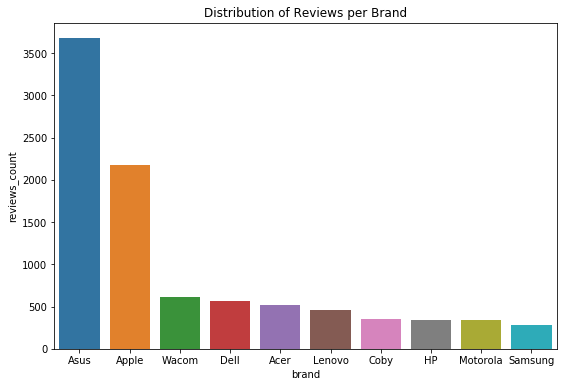

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#We filter the top 10 brands with the highest number of reviews.
top_10_brands = pd.DataFrame(df_tab['brand'].value_counts().head(10))
top_10_brands.reset_index(inplace=True)
top_10_brands.columns= ['brand', 'reviews_count']

# We plot the top 10 brands, by number of reviews received.
fig,ax = plt.subplots(figsize=(9,6))

sns.barplot(x="brand", y="reviews_count",
                data=top_10_brands,
                ax=ax);

ax.set_title('Distribution of Reviews per Brand')
'''Apple and Asus are way ahead of their concurrents in terms of reviews.'''

'Analysis: All top 10 brands have more positive than negative reviews. However, Apple and Asus show a significant\nnumber of positive reviews compared to negative. In fact, from the plot, we can see that the more reviews you have,\nmore likely you are of having positive reviews, and therefore, being at the top.'

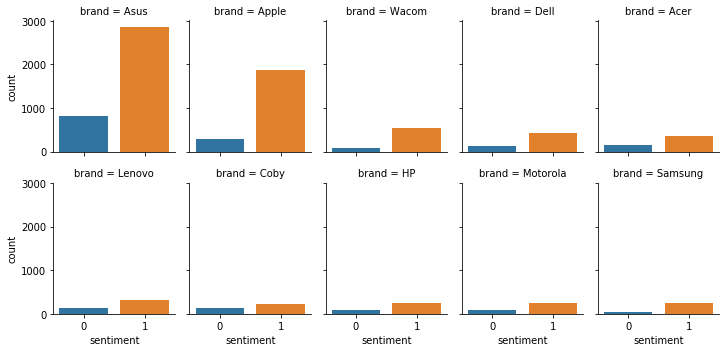

In [19]:
# We look at the number of positive and negative reviews for the top 10 most reviewed brands.

# Create a list with the order that we would like to display in our plot.
list_10 = top_10_brands['brand'].unique()

subset_df_top_10_brands = df_tab[df_tab['brand'].isin(list_10)]

g = sns.catplot(x="sentiment", col="brand", col_wrap=5,
                data=subset_df_top_10_brands,
                kind="count", height=2.5, aspect=.8, col_order=list_10)

'''Analysis: All top 10 brands have more positive than negative reviews. However, Apple and Asus show a significant
number of positive reviews compared to negative. In fact, from the plot, we can see that the more reviews you have,
more likely you are of having positive reviews, and therefore, being at the top.'''

#source: https://www.geeksforgeeks.org/python-seaborn-catplot/

'Analysis: Customers from the top 4 brands are happy with their purchases, with few outliers. Similarly, customers of\nbrands in position 9 and 10, are generally satisfied with their products.\nBrands ranked between the 5th and 8th position have the worse performance in the top 10 group. These are Acer, Lenovo,\nCoby and HP. Special attention to Coby, where customers ratings are more distributed than the other brands.\n\nFuture research: It could be interesting to look at what the outliers are saying because they can be an important \nsource for insights for future improvements.'

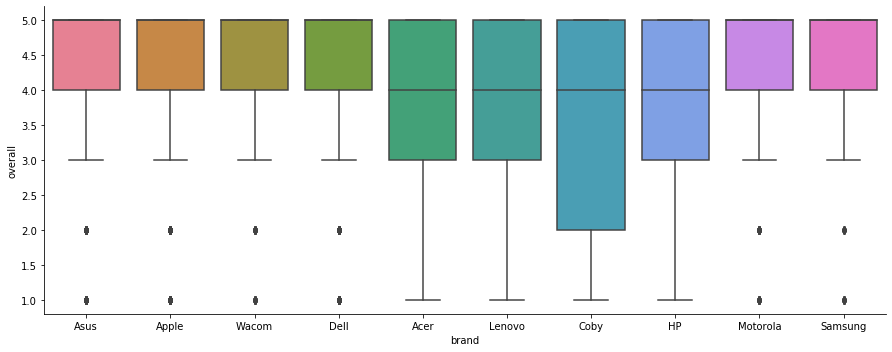

In [20]:
# Boxplot representing the ratings by brands.
g = sns.catplot(x="brand", y="overall",
                data=subset_df_top_10_brands, 
                kind="box", order=list_10,
                height=5, aspect=2.5, palette="husl")

'''Analysis: Customers from the top 4 brands are happy with their purchases, with few outliers. Similarly, customers of
brands in position 9 and 10, are generally satisfied with their products.
Brands ranked between the 5th and 8th position have the worse performance in the top 10 group. These are Acer, Lenovo,
Coby and HP. Special attention to Coby, where customers ratings are more distributed than the other brands.

Future research: It could be interesting to look at what the outliers are saying because they can be an important 
source for insights for future improvements.'''

/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


'Analysis: We can see a number of interesting facts in this plot. First, Asus was at the top of tablets sales until\n2012. Then, Apple took the lead, and Asus experienced a steady decrease. However, Asus kept the second position during \nthe whole period. Some other companies such as Lenovo, Sony and Acer, were increasing sales, until 2013. After that, all \ncompanies saw their demand dwingle, except for Samsung. Samsung was the only brand that kept an upward trend during \nthe whole period. '

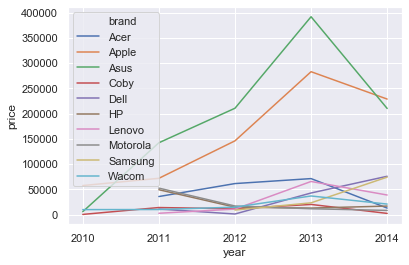

In [21]:
# creating a column to store the year of the review
subset_df_top_10_brands['year'] = pd.DatetimeIndex(subset_df_top_10_brands['timeFormat']).year

# reassigning the variable with data from 2010 onwards, because before that, there was not much data for tablets.
subset_df_top_10_brands = subset_df_top_10_brands[subset_df_top_10_brands['year'] >= 2010]

# creating a new subset with brand, year and total sales (sales = sum of prices of each product, by brand)
sales_per_year_by_brand = subset_df_top_10_brands.groupby(['brand', 'year'])['price'].sum()

pd.DataFrame(sales_per_year_by_brand)

sales_per_year_by_brand = sales_per_year_by_brand.reset_index()

sns.set(style="darkgrid")
g = sns.lineplot(x='year', y='price', hue='brand', 
               data=sales_per_year_by_brand, sizes=(.25, 2.5))
g.set_xticks(range(2010, 2015)) # setting the ticks first
g.set_xticklabels(['2010','2011','2012','2013','2014'])



'''Analysis: We can see a number of interesting facts in this plot. First, Asus was at the top of tablets sales until
2012. Then, Apple took the lead, and Asus experienced a steady decrease. However, Asus kept the second position during 
the whole period. Some other companies such as Lenovo, Sony and Acer, were increasing sales, until 2013. After that, all 
companies saw their demand dwingle, except for Samsung. Samsung was the only brand that kept an upward trend during 
the whole period. '''

In [22]:
# Which Samsung tablet has more reviews?
# How the rank of this product changed over time?

### 2.1.2) Product Analysis <a class="anchor" id="part2.1.2"></a>

'Analysis: We can see that Apple ipads dominate the market and are on the top of reviews, competing with Asus \ntablets. We could use the product descrition to find the features that the top 20 most reviewed tablets have.'

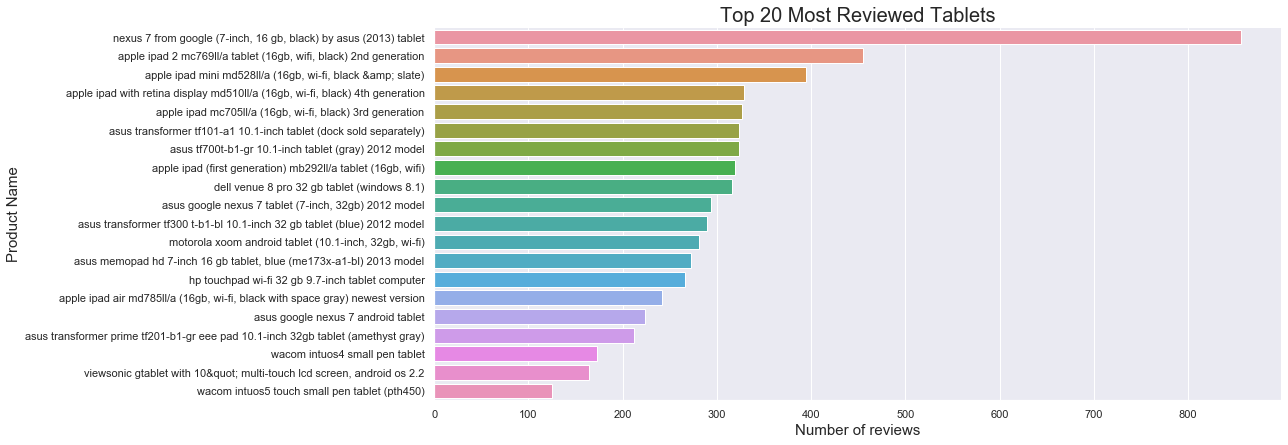

In [23]:
# Now let's look at the top most reviewed tablets.
top_20_products = pd.DataFrame(df_tab['title'].value_counts()[:20])
top_20_products.reset_index(inplace=True)
top_20_products.columns= ['product', 'reviews_count']
top_20_products


g2 = sns.catplot(x="reviews_count", y="product",
                data=top_20_products, kind="bar",
                height=6, aspect=3)
# g2.set_title('Top 20 Most Reviewed Tablets')

plt.xlabel("Number of reviews", size = 15)
plt.ylabel("Product Name", size = 15)
plt.title("Top 20 Most Reviewed Tablets", size=20)

'''Analysis: We can see that Apple ipads dominate the market and are on the top of reviews, competing with Asus 
tablets. We could use the product descrition to find the features that the top 20 most reviewed tablets have.''' 

### 2.1.3) Feature Correlation Analysis <a class="anchor" id="part2.1.3"></a>

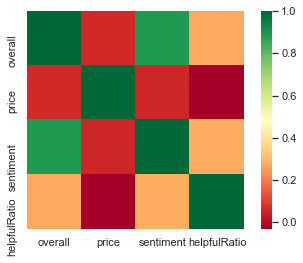

In [24]:
ax = sns.heatmap(df_tab.corr(), square=True, cmap='RdYlGn')
plt.show()

# From the heatmap we can see that there are no relevant correlations between the numerical variables.
# The only features that are strongly correlated are sentiment and overall, as expected,
# since sentiment was a feature derived from overall rating.
# It is also possible to check that price and ratings are not related.


## 2.2) Sentiment Analysis <a class="anchor" id="part2.2"></a>

### 2.2.1) Sentiment analysis across time <a class="anchor" id="part2.2.1"></a>

Text(0.5, 0, '')

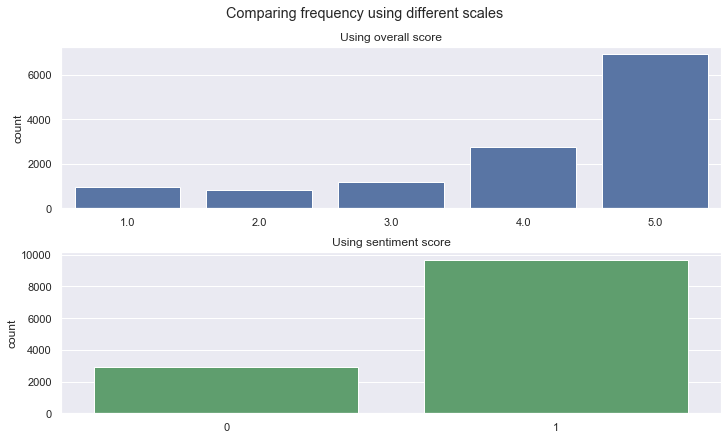

In [25]:
#import seaborn and matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#create two subplots and define figsize
fig, ax = plt.subplots(2, figsize=(10,6),constrained_layout=True)

#Main title
fig.suptitle("Comparing frequency using different scales")

#First ax title
ax[0].set_title("Using overall score")
#plot frequency count of overall score
sns.countplot(ax=ax[0],x="overall",data=df_tab,color="b")
ax[0].set_xlabel("")

#Second ax title
ax[1].set_title("Using sentiment score")
#ax[1].set_xtitle("")
#plot frequency count of response score
sns.countplot(ax=ax[1],x="sentiment",data=df_tab,color="g")
ax[1].set_xlabel("")

In [26]:
df_tab_time=df_tab.groupby("month_year").mean()
df_tab_time.reset_index(drop=False, inplace=True)
df_tab_time.head()

,month_year,overall,price,sentiment,helpfulRatio
0,2005-08,4.5,305.95,1.0,0.968750
1,2005-10,5.0,169.95,1.0,0.932432
2,2005-12,4.0,259.95,1.0,0.944444
3,2006-01,5.0,305.95,1.0,0.692308
4,2006-02,3.5,240.97,0.5,0.925753


In [27]:
df_tab_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   month_year    100 non-null    period[M]
 1   overall       100 non-null    float64  
 2   price         100 non-null    float64  
 3   sentiment     100 non-null    float64  
 4   helpfulRatio  100 non-null    float64  
dtypes: float64(4), period[M](1)
memory usage: 4.0 KB


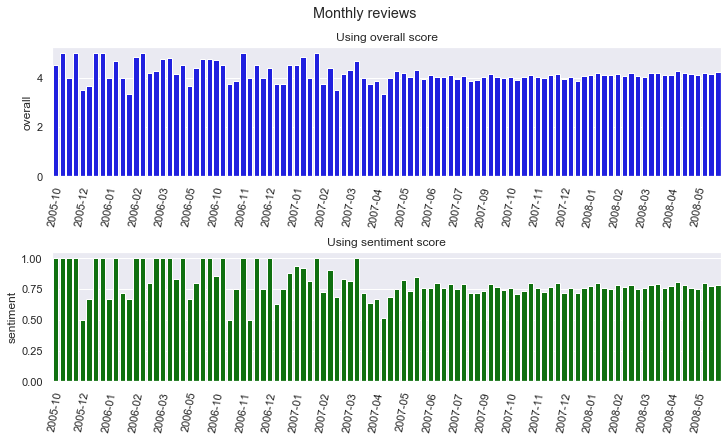

In [28]:
import matplotlib.dates as mdates

#create two subplots and define figsize
fig, ax = plt.subplots(2, figsize=(10,6),constrained_layout=True)
#fig.tight_layout()

#Main title
fig.suptitle("Monthly reviews")

#First ax title
ax[0].set_title("Using overall score")
#plot frequency count of overall score
sns.barplot(x="month_year",y="overall",data=df_tab_time,color="blue",ax=ax[0])

ax[0].set_xlabel("")

#Second ax title
ax[1].set_title("Using sentiment score")
#plot frequency count of overall score
sns.barplot(x="month_year",y="sentiment",data=df_tab_time,color="green",ax=ax[1])

ax[1].set_xlabel("")


#Modify x tick labels, rotate 80 degrees and show every 4th element
for i in ax:
    i.xaxis.set_major_locator(ticker.MultipleLocator(4))
    i.set_xticklabels(i.get_xticklabels(), rotation=80)




plt.show()

### 2.2.2) TD-IDF Analysis for all dataset <a class="anchor" id="part2.2.2"></a>

In [29]:
#libraries for data analytics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

#Each item on the list is a review
review_words= [x.strip() for x in df_tab["reviewText"]]
review_words[:5]

['The Nook Tablet, in both the 16gb version and 8 gb version, are the best color e-readers of 2012.  Both are bargains when purchased at the discounted price Barnes & Noble provides to its members.However, they are designed for reading...if you want a gaming tablet, a Skype video tablet, or need access to thousands of apps, you need an I-Pad.I have owned a "Brand X" color e-reader for about a year, but seldom use it for reading because it causes eye strain. I have a Nook Simple Touch e-reader that is wonderful for books, but its e-ink screen is black on white only, which does not work well for colorful magazines such as "Automobile" or "National Geographic".Barnes & Noble has an offer that enables its members to buy the Nook tablet for MUCH less than the price quoted by internet vendors, so I took advantage of their offer...plus the staff of my neighborhood Barnes & Noble were very helpful, and invited me to classes they provide to teach new owners the in\'s and out\'s of their new tab

In [30]:
#tfidf is receiving the sklearn method of tf-idf analysis; stop words in English; the analysis will consider only 1,000 words
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english')

#fit the tfidf algorithm with review_words 
tfidf_an = tfidf.fit(review_words)
#transform to document-term matrix
corpus_tf_idf = tfidf_an.transform(review_words) 

sum_words_idf = corpus_tf_idf.sum(axis=0)
words_freq_idf = [(word, sum_words_idf[0, idx]) for word, idx in tfidf_an.vocabulary_.items()]

tfidf_df=pd.DataFrame(words_freq_idf,columns=["Word","Count"])
tfidf_df=tfidf_df.sort_values(by="Count",ascending=False)

tfidf_df.head(10)

,Word,Count
1,tablet,671.332806
529,ipad,490.158940
33,use,364.876011
177,great,364.296478
42,screen,336.449551
153,good,307.943608
267,like,306.552687
236,just,293.467546
195,android,252.447394
440,device,245.635771


In [31]:
#intialise countvectoriser; stop words in English
cv = CountVectorizer(analyzer='word', stop_words = 'english') 
# fit to review_words
tf_an=cv.fit_transform(review_words)

#get the word names
sum_words_tf=cv.get_feature_names()
#term frequency of each word
count_words_tf=tf_an.toarray().sum(axis=0)

#transform both lists to dataframe
tf_df=pd.DataFrame(list(zip(sum_words_tf,count_words_tf)),columns=["Word","Count"])
tf_df=tf_df.sort_values(by="Count",ascending=False)

tf_df.head(10)

,Word,Count
30584,tablet,22377
17270,ipad,13566
33273,use,11004
27282,screen,10181
18730,like,9467
17839,just,8790
14762,great,7737
14499,good,7377
10026,device,6819
3716,android,6475


Text(0.5, 0, '')

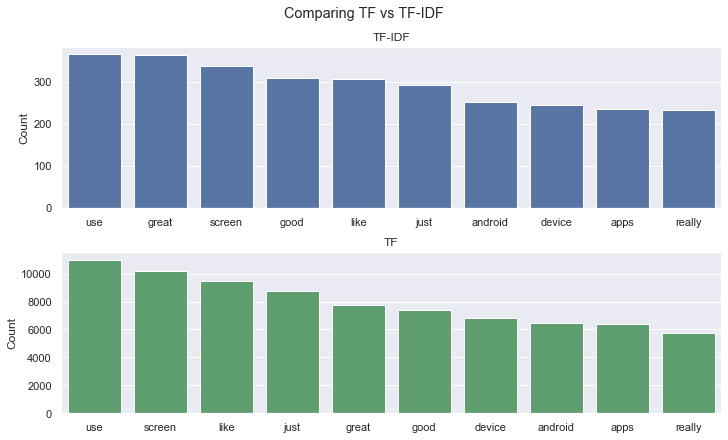

In [32]:
#create two subplots and define figsize
fig, ax = plt.subplots(2, figsize=(10,6),constrained_layout=True)

#Main title
fig.suptitle("Comparing TF vs TF-IDF")

#First ax title
ax[0].set_title("TF-IDF")
#plot frequency count of overall score
sns.barplot(ax=ax[0],x="Word",y="Count",data=tfidf_df.head(12).tail(10),color="b")
ax[0].set_xlabel("")

#Second ax title
ax[1].set_title("TF")
#plot frequency count of response score
sns.barplot(ax=ax[1],x="Word",y="Count",data=tf_df.head(12).tail(10),color="g")
ax[1].set_xlabel("")



### 2.2.3) TF-IDF analysis for positive sentiment <a class="anchor" id="part2.2.3"></a>

In [33]:
#Each item on the list is a review

df_pos=df_tab[df_tab["sentiment"]==1]

review_words_pos= [x.strip() for x in df_pos["reviewText"]]
review_words_pos[:5]

['The Nook Tablet, in both the 16gb version and 8 gb version, are the best color e-readers of 2012.  Both are bargains when purchased at the discounted price Barnes & Noble provides to its members.However, they are designed for reading...if you want a gaming tablet, a Skype video tablet, or need access to thousands of apps, you need an I-Pad.I have owned a "Brand X" color e-reader for about a year, but seldom use it for reading because it causes eye strain. I have a Nook Simple Touch e-reader that is wonderful for books, but its e-ink screen is black on white only, which does not work well for colorful magazines such as "Automobile" or "National Geographic".Barnes & Noble has an offer that enables its members to buy the Nook tablet for MUCH less than the price quoted by internet vendors, so I took advantage of their offer...plus the staff of my neighborhood Barnes & Noble were very helpful, and invited me to classes they provide to teach new owners the in\'s and out\'s of their new tab

In [34]:
#tfidf is receiving the sklearn method of tf-idf analysis; stop words in English; the analysis will consider only 1,000 words
tfidf_pos = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english')

# >>> vectorizer = TfidfVectorizer()
# >>> X = vectorizer.fit_transform(corpus)
# >>> print(vectorizer.get_feature_names())
# ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

#fit the tfidf algorithm with review_words 
tfidf_an_pos = tfidf_pos.fit(review_words_pos)
#transform to document-term matrix
corpus_tf_idf_pos = tfidf_an_pos.transform(review_words_pos) 

sum_words_idf_pos = corpus_tf_idf_pos.sum(axis=0)
words_freq_idf_pos = [(word, sum_words_idf_pos[0, idx]) for word, idx in tfidf_an_pos.vocabulary_.items()]

tfidf_df_pos=pd.DataFrame(words_freq_idf_pos,columns=["Word","Count"])
tfidf_df_pos=tfidf_df_pos.sort_values(by="Count",ascending=False)

tfidf_df_pos.head(10)

,Word,Count
1,tablet,526.926668
423,ipad,397.783268
177,great,310.337041
33,use,295.588571
42,screen,255.913613
153,good,247.888994
250,like,241.690208
236,just,223.232644
273,love,204.786367
195,android,198.161957


In [35]:
#intialise countvectoriser; stop words in English
cv_pos = CountVectorizer(analyzer='word', stop_words = 'english') 
# fit to review_words
tf_an_pos=cv_pos.fit_transform(review_words_pos)

#get the word names
sum_words_tf_pos=cv_pos.get_feature_names()
#term frequency of each word
count_words_tf_pos=tf_an_pos.toarray().sum(axis=0)

#transform both lists to dataframe
tf_df_pos=pd.DataFrame(list(zip(sum_words_tf_pos,count_words_tf_pos)),columns=["Word","Count"])
tf_df_pos=tf_df_pos.sort_values(by="Count",ascending=False)

tf_df_pos.head(10)

,Word,Count
26212,tablet,17078
14765,ipad,10865
28505,use,8769
23385,screen,7581
16023,like,7318
12605,great,6606
15249,just,6430
12376,good,5734
3084,android,5037
3390,apps,4960


Text(0.5, 0, '')

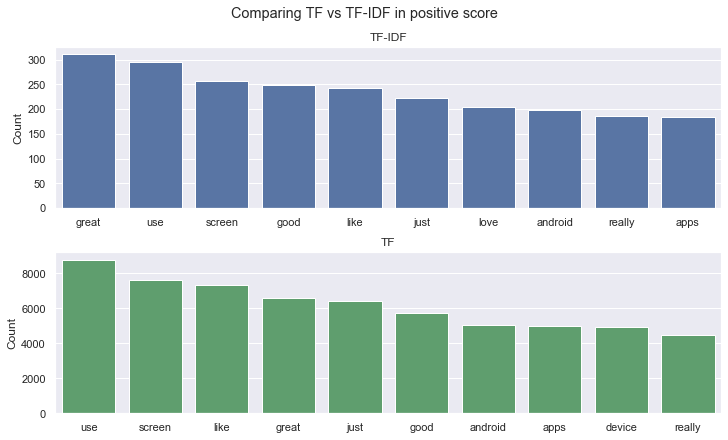

In [36]:
#create two subplots and define figsize
fig, ax = plt.subplots(2, figsize=(10,6),constrained_layout=True)

#Main title
fig.suptitle("Comparing TF vs TF-IDF in positive score")

#First ax title
ax[0].set_title("TF-IDF")
#plot frequency count of overall score
sns.barplot(ax=ax[0],x="Word",y="Count",data=tfidf_df_pos.head(12).tail(10),color="b")
ax[0].set_xlabel("")

#Second ax title
ax[1].set_title("TF")
#plot frequency count of response score
sns.barplot(ax=ax[1],x="Word",y="Count",data=tf_df_pos.head(12).tail(10),color="g")
ax[1].set_xlabel("")



### 2.2.4) TF-IDF analysis for negative sentiment  <a class="anchor" id="part2.2.4"></a>

In [37]:
#Each item on the list is a review

df_neg=df_tab[df_tab["sentiment"]==0]

review_words_neg= [x.strip() for x in df_neg["reviewText"]]
review_words_neg[:5]

['I saw this product on Amazon and thought "what a great deal" because this is a 16GB version of the same tablet that Barnes & Noble is selling for $250 dollars.It mostly works, and the screen is great for reading books.  I have had problems with the browser since 2 weeks of owning and the Apps have issues loading and playing some games.  If I could, I would return this product and just pay out the money for a brand new one.',
 "Have no idea why people love this thing so much, you can't load any applications unless they are from the Barnes & Noble store and you can't even download the free version of Angry Birds.Apparently Barnes & Noble is worse than Apple at remotely disabling Nooks they deemed rooted by end users. You have less control of this thing than you would your TV.The root kits are useless for this OS version 1.4.2 and the instructions to root / jailbreak it read worse than rocket instructions from annoying geeks !It is an overpriced Barnes & Noble franchise in your dumb lit

In [38]:
#tfidf is receiving the sklearn method of tf-idf analysis; stop words in English; the analysis will consider only 1,000 words
tfidf_neg = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english')

#fit the tfidf algorithm with review_words 
tfidf_an_neg = tfidf_neg.fit(review_words_neg)
#transform to document-term matrix
corpus_tf_idf_neg = tfidf_an_neg.transform(review_words_neg) 

sum_words_idf_neg = corpus_tf_idf_neg.sum(axis=0)
words_freq_idf_neg = [(word, sum_words_idf_neg[0, idx]) for word, idx in tfidf_an_neg.vocabulary_.items()]

tfidf_df_neg=pd.DataFrame(words_freq_idf_neg,columns=["Word","Count"])
tfidf_df_neg=tfidf_df_neg.sort_values(by="Count",ascending=False)

tfidf_df_neg.head(10)

,Word,Count
8,tablet,151.694724
439,ipad,93.992757
15,screen,84.294690
28,just,73.337396
89,use,71.840500
210,like,67.786724
78,device,65.847289
921,asus,63.427766
91,good,62.922191
132,android,56.421226


In [39]:
#intialise countvectoriser; stop words in English
cv_neg = CountVectorizer(analyzer='word', stop_words = 'english') 
# fit to review_words
tf_an_neg=cv_neg.fit_transform(review_words_neg)

#get the word names
sum_words_tf_neg=cv_neg.get_feature_names()
#term frequency of each word
count_words_tf_neg=tf_an_neg.toarray().sum(axis=0)

#transform both lists to dataframe
tf_df_neg=pd.DataFrame(list(zip(sum_words_tf_neg,count_words_tf_neg)),columns=["Word","Count"])
tf_df_neg=tf_df_neg.sort_values(by="Count",ascending=False)

tf_df_neg.head(10)

,Word,Count
15242,tablet,5299
8503,ipad,2701
13515,screen,2600
8750,just,2360
16532,use,2235
9196,like,2149
4743,device,1909
7092,good,1643
15694,time,1555
1956,asus,1449


Text(0.5, 0, '')

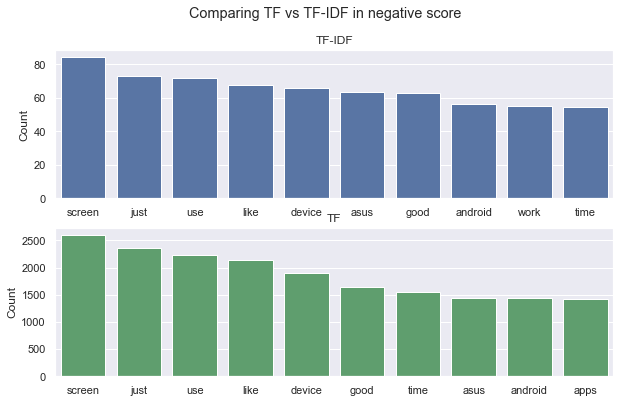

In [40]:
#create two subplots and define figsize
fig, ax = plt.subplots(2, figsize=(10,6))

#Main title
fig.suptitle("Comparing TF vs TF-IDF in negative score")

#First ax title
ax[0].set_title("TF-IDF")
#plot frequency count of overall score
sns.barplot(ax=ax[0],x="Word",y="Count",data=tfidf_df_neg.head(12).tail(10),color="b")
ax[0].set_xlabel("")

#Second ax title
ax[1].set_title("TF")
#plot frequency count of response score
sns.barplot(ax=ax[1],x="Word",y="Count",data=tf_df_neg.head(12).tail(10),color="g")
ax[1].set_xlabel("")

## 2.3) Time Series Analysis  <a class="anchor" id="part2.3"></a>

### 2.3.1) Cyclical Events  <a class="anchor" id="part2.3.1"></a>

In [41]:
#Group by timeFormat column
#Apply -> sentiment: mean and count; overall: mean
ser_tab_time=df_tab.groupby("timeFormat").agg({"sentiment":["mean","count"], "overall":"mean"})
#Drop one level of column names
ser_tab_time.columns = ser_tab_time.columns.droplevel()

#find min and max datetime
min_date=min(ser_tab_time.index)
max_date=max(ser_tab_time.index)

#reindex the series and filling missing dates with np.nan
ser_tab_time=ser_tab_time.reindex(pd.date_range( min_date, max_date), fill_value=np.nan)

#renaming the columns
ser_tab_time.columns=["s_mean","s_count","o_mean"]

#Sampling the values into months
#Apply the same criteria for the functions
df_tab_month=ser_tab_time.resample("M").agg({"s_mean":"mean","s_count":"sum","o_mean":"mean"})
df_tab_month.head(5)

,s_mean,s_count,o_mean
2005-08-31,1.0,2.0,4.5
2005-09-30,NaN,0.0,NaN
2005-10-31,1.0,1.0,5.0
2005-11-30,NaN,0.0,NaN
2005-12-31,1.0,1.0,4.0


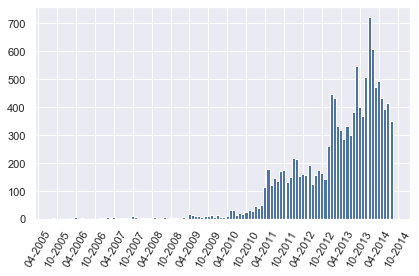

In [42]:
#There are some months without reviews. In addition, it can be seen a peak of sales after 2010.
#Makes sense considering that Apple release the iPad in April 3, 2010
#https://en.wikipedia.org/wiki/IPad_(1st_generation)#:~:text=The%20Wi%2DFi%20version%20of,was%20released%20on%20April%2030.

fig , ax = plt.subplots()

#ax.plot_date(df_tab_month.index.to_pydatetime(), df_tab_month["s_count"])
#graph a barplot for the time series
ax.bar(df_tab_month.index.to_pydatetime(), df_tab_month["s_count"], width=30)
#define the xaxis as date
ax.xaxis_date()

#change the x axis format 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
#rotate the x ticks
plt.xticks(rotation=60)
plt.tight_layout()

plt.show()

In [43]:
#source: https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
df_tab['timeFormat'].min(), df_tab['timeFormat'].max()

(Timestamp('2005-08-02 00:00:00'), Timestamp('2014-07-23 00:00:00'))

In [44]:
df_tab_ordered = df_tab.sort_values('timeFormat')
df_tab_ordered.isnull().sum()

reviewerID         0
asin               0
reviewText         0
overall            0
summary            0
description       45
categories         0
title              0
price              0
salesRank       8204
related            0
brand              0
timeFormat         0
sentiment          0
helpfulRatio    3610
month_year         0
dtype: int64

In [45]:
df_tab_ordered = df_tab_ordered.groupby('timeFormat')['price'].sum().reset_index()
df_tab_ordered = df_tab_ordered.set_index('timeFormat')
df_tab_ordered.index

DatetimeIndex(['2005-08-02', '2005-10-18', '2005-12-15', '2006-01-06',
               '2006-02-01', '2006-02-22', '2006-03-02', '2006-03-09',
               '2006-03-12', '2006-03-15',
               ...
               '2014-07-14', '2014-07-15', '2014-07-16', '2014-07-17',
               '2014-07-18', '2014-07-19', '2014-07-20', '2014-07-21',
               '2014-07-22', '2014-07-23'],
              dtype='datetime64[ns]', name='timeFormat', length=1682, freq=None)

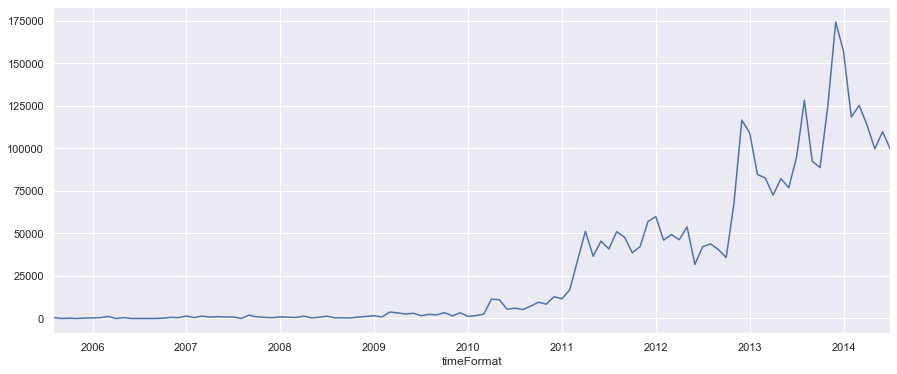

In [46]:

# We assume that the sum of the prices of products that were reviewed in a certain month represents the
# total sales in that month. 
y = df_tab_ordered['price'].resample('MS').sum()

# in the resample function we used the argument 'MS' for the parameter 'role'. 
# in the resample function, 'MS' refers to month start frequency, which was the timestamp used for this analysis.

y.plot(figsize=(15, 6))
plt.show()

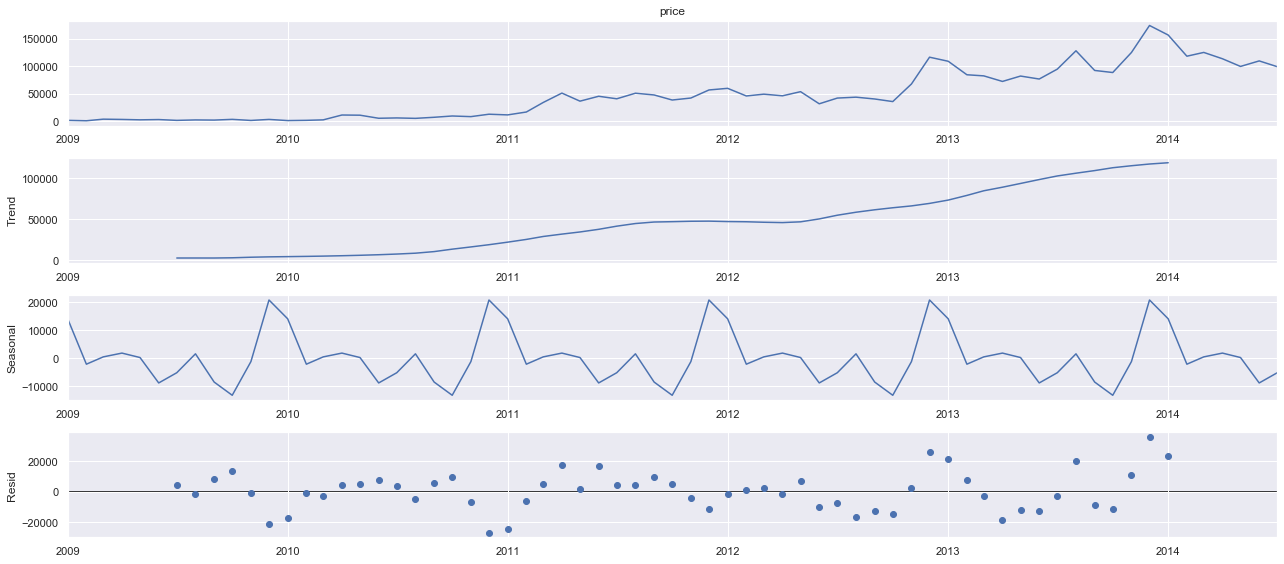

In [47]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8

# Because the function seasonal_decompose() does not handle missing values, we will take data starting from 2009.
decomposition = sm.tsa.seasonal_decompose(y['2009':], model='additive')
fig = decomposition.plot()
plt.show()

In [48]:
'''The plot shows that the tablet sales have an overall upward trend. It also suggests a seasonality pattern, mostly 
associated with the months that Apple has new releases. This pattern started after Apple launched its first iPad in 
April 2010. As we can see from the plot, there is the first peak in tablet sales during this time. An even more 
significant peak happens in March 2011, when Apple launches iPad 2. In the following year, tablet sales are unstable 
and experiences a slight decrease in purchases. However, in November 2013 we see a new significant 
peak, most likely associated with Apple releasing 2 new iPads (iPad Air and iPad Mini 2). 

From this plot we can infer that Apple releases play a tremendous impact in the overall sales of tablets.'''


'The plot shows that the tablet sales have an overall upward trend. It also suggests a seasonality pattern, mostly \nassociated with the months that Apple has new releases. This pattern started after Apple launched its first iPad in \nApril 2010. As we can see from the plot, there is the first peak in tablet sales during this time. An even more \nsignificant peak happens in March 2011, when Apple launches iPad 2. In the following year, tablet sales are unstable \nand experiences a slight decrease in purchases. However, in November 2013 we see a new significant \npeak, most likely associated with Apple releasing 2 new iPads (iPad Air and iPad Mini 2). \n\nFrom this plot we can infer that Apple releases play a tremendous impact in the overall sales of tablets.'

In [49]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [50]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2630.3972100128362
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2312.4134502793663
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2200.2328360963284
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1932.8743764435908
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2160.0293980699844
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2136.3831676256823
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1935.5030941452776
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1899.055453985708
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2528.5399365522358
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2236.485512307254
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2123.40076503884
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1859.5421934853728
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2271.477624574957
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2225.5111730501058
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1901.9901815397664
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1849.2648588256293
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2296.5577645085996
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2031.45618588143

In [51]:
# From the output we can see that the SARIMAX (1, 1, 1)x(1, 1, 1, 12) gives us the most optimal option with the
# AIC value of 1686.55. Therefore, we will use it.

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5905      0.454     -1.301      0.193      -1.480       0.299
ma.L1          0.4187      0.476      0.880      0.379      -0.514       1.352
ar.S.L12       0.3747      3.288      0.114      0.909      -6.069       6.818
ma.S.L12      -0.4318      3.260     -0.132      0.895      -6.820       5.957
sigma2      1.138e+08   3.86e-07   2.95e+14      0.000    1.14e+08    1.14e+08


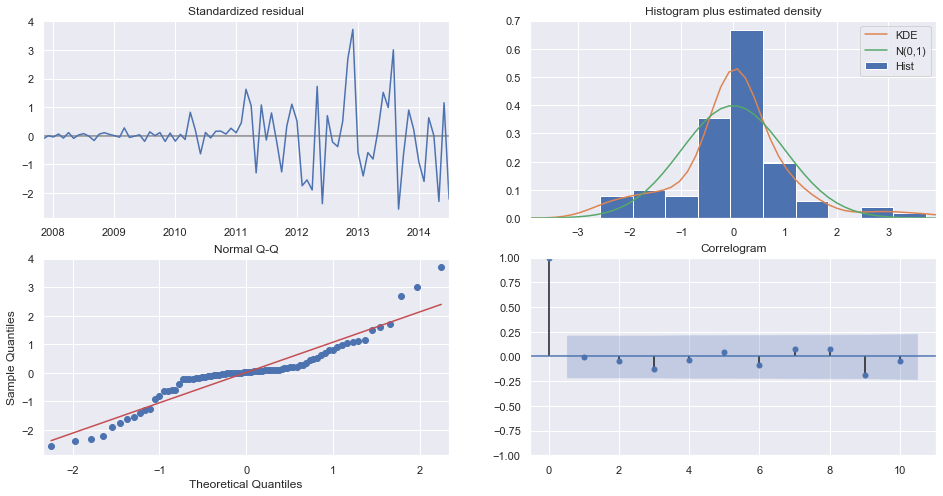

In [52]:
# Now we will use the diagnostics method to explore possible uncommon behaviour.
results.plot_diagnostics(figsize=(16, 8))
plt.show()

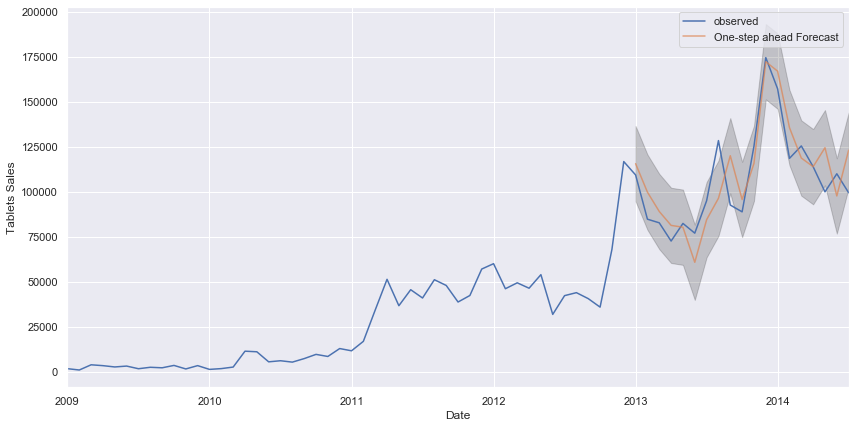

In [53]:
pred = results.get_prediction(start=pd.to_datetime('2013-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2009':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Tablets Sales')
plt.legend()
plt.show()

In [54]:
# create a copy of the dataframe, and add columns for month and year
df_tablets = df_tab[['timeFormat', 'price']].set_index('timeFormat')
df_tablets['month'] = [i.month for i in df_tablets.index]
df_tablets['year'] = [i.year for i in df_tablets.index]
# group by month and year, get the sum
df_tablets = df_tablets.groupby(['month', 'year']).sum()
df_tablets = df_tablets.unstack(level=0)
df_tablets.dropna(inplace=True)
df_tablets

price                                                              \
month         1         2         3         4         5         6         7    
year                                                                           
2008      947.83    753.48    596.17   1391.29    335.94    742.50   1339.58   
2009     1636.75    898.89   3792.63   3313.44   2591.43   3083.16   1609.14   
2010     1240.78   1676.21   2530.76  11352.95  11026.13   5437.32   6045.26   
2011    11564.36  16817.79  34194.51  51269.62  36607.29  45499.68  40898.34   
2012    59955.23  46044.85  49331.29  46327.35  53863.21  31790.48  42210.43   
2013   109247.48  84673.25  82650.24  72522.05  82312.08  76907.79  94915.71   

                                                            
month         8         9         10         11         12  
year                                                        
2008      334.95    404.63    315.94     886.57    1184.44  
2009     2410.53   2127.41   3447.69    1488.87    3330.71  
2010     5274.98   7230.59   9575.38    8418.48   12814.42  
2011    51049.29  47870.28  38663.59   42287.97   56974.78  
2012    43861.50  40540.05  35823.50   67885.55  116678.09  
2013   128335.05  92525.01  88743.50  125209.97  174418.89

In [55]:
# create a copy of the dataframe, and add columns for month and year
df_reviews_year = df_tab[['timeFormat', 'price']].set_index('timeFormat')
df_reviews_year['month'] = [i.month for i in df_reviews_year.index]
df_reviews_year['year'] = [i.year for i in df_reviews_year.index]
# group by month and year, get the count
df_reviews_year = df_reviews_year.groupby(['month', 'year']).count()

df_reviews_year = df_reviews_year.unstack(level=0)
#Dropping null values for the months
df_reviews_year.dropna(inplace=True)

df_reviews_year

price                                                                 \
month     1      2      3      4      5      6      7      8      9      10   
year                                                                          
2008     5.0    4.0    4.0    7.0    2.0    4.0    8.0    1.0    2.0    2.0   
2009     8.0    4.0   17.0   16.0   12.0   11.0    6.0   11.0   10.0   16.0   
2010     6.0    7.0   11.0   33.0   31.0   16.0   20.0   17.0   26.0   33.0   
2011    39.0   50.0  116.0  179.0  121.0  147.0  137.0  171.0  174.0  132.0   
2012   213.0  155.0  162.0  159.0  192.0  124.0  156.0  175.0  165.0  142.0   
2013   433.0  331.0  319.0  286.0  331.0  302.0  383.0  547.0  402.0  367.0   

                     
month     11     12  
year                 
2008     4.0    5.0  
2009     6.0   16.0  
2010    29.0   46.0  
2011   149.0  217.0  
2012   261.0  446.0  
2013   507.0  723.0

In [56]:
df_reviews_year.sum(axis=1)

year
2008      48.0
2009     133.0
2010     275.0
2011    1632.0
2012    2350.0
2013    4931.0
dtype: float64

In [57]:
df_tablets


price                                                              \
month         1         2         3         4         5         6         7    
year                                                                           
2008      947.83    753.48    596.17   1391.29    335.94    742.50   1339.58   
2009     1636.75    898.89   3792.63   3313.44   2591.43   3083.16   1609.14   
2010     1240.78   1676.21   2530.76  11352.95  11026.13   5437.32   6045.26   
2011    11564.36  16817.79  34194.51  51269.62  36607.29  45499.68  40898.34   
2012    59955.23  46044.85  49331.29  46327.35  53863.21  31790.48  42210.43   
2013   109247.48  84673.25  82650.24  72522.05  82312.08  76907.79  94915.71   

                                                            
month         8         9         10         11         12  
year                                                        
2008      334.95    404.63    315.94     886.57    1184.44  
2009     2410.53   2127.41   3447.69    1488.87    3330.71  
2010     5274.98   7230.59   9575.38    8418.48   12814.42  
2011    51049.29  47870.28  38663.59   42287.97   56974.78  
2012    43861.50  40540.05  35823.50   67885.55  116678.09  
2013   128335.05  92525.01  88743.50  125209.97  174418.89

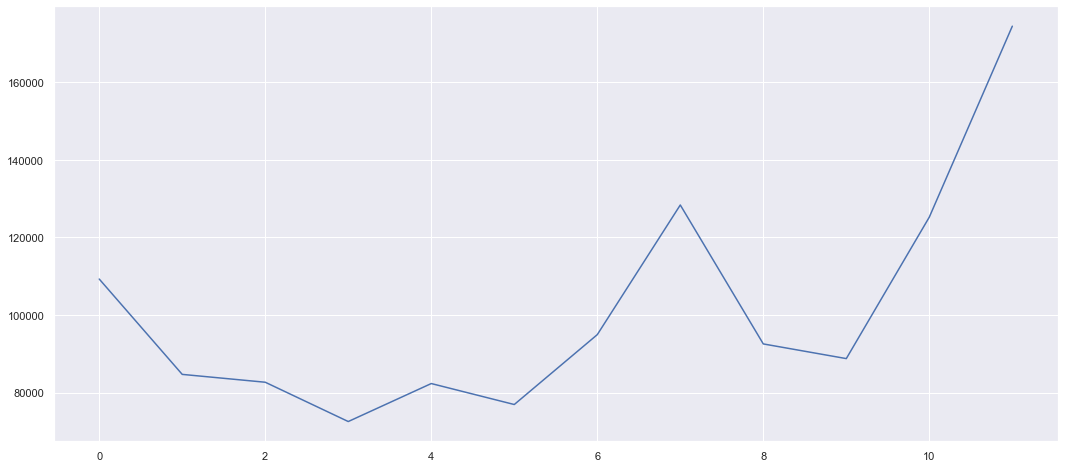

In [58]:
#Grabbing the values of the last row (year 2013)
list_sales = df_tablets.iloc[-1].values[:]

#Creating a list with the months
#list_months = ['Jan', 'Fev', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
list_months = range(1,13)

#Zipping both lists and creating a dataframe
list_of_tuples = list(zip(list_months, list_sales)) 
df_2013 = pd.DataFrame(list_of_tuples, columns = ['Period', 'Sales']) 

plt.plot(df_2013['Sales'])
plt.show()

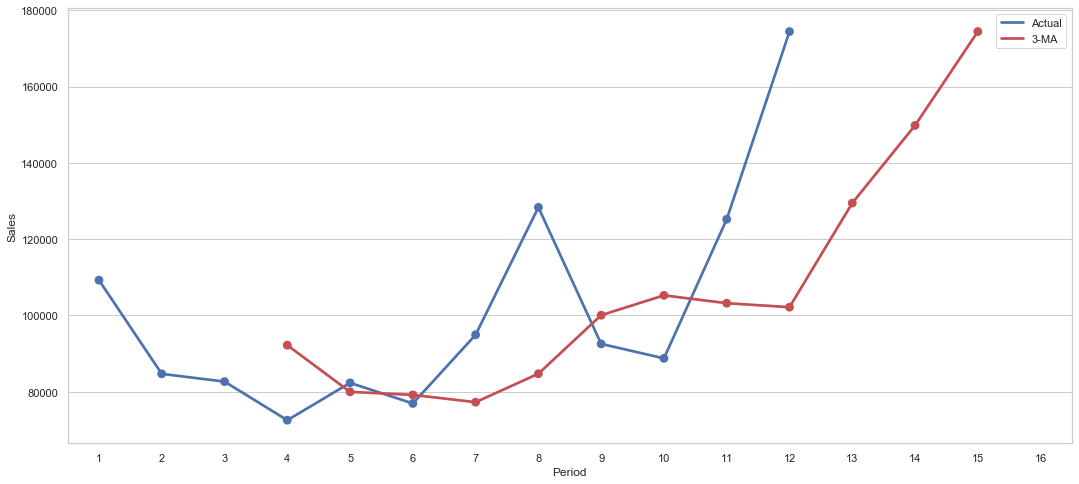

In [411]:
# Using moving average
def moving_average(df, k, to_period):
    moving_average_df = pd.DataFrame(columns=['Period','Sales'])
    num_df = len(df)
    for m in range(0, to_period):
        if m < k:
            sale_predict = float('nan')
        else:
            history = df['Sales'][m-k:m]
            sale_predict = history.mean()
        moving_average_df.loc[m] = [m+1, sale_predict]
    
    moving_average_df['Period'] = moving_average_df['Period'].astype(int)
    return moving_average_df

f, ax = plt.subplots(1, 1)
ma_df = moving_average(df_2013, 3, 16)
sns.pointplot(x='Period', y='Sales', data=df_2013, color='b')
sns.pointplot(x='Period', y='Sales', data=ma_df, color='r')
ax.legend(handles=ax.lines[::len(df_2013)+1], labels=["Actual", "3-MA"])
plt.show()

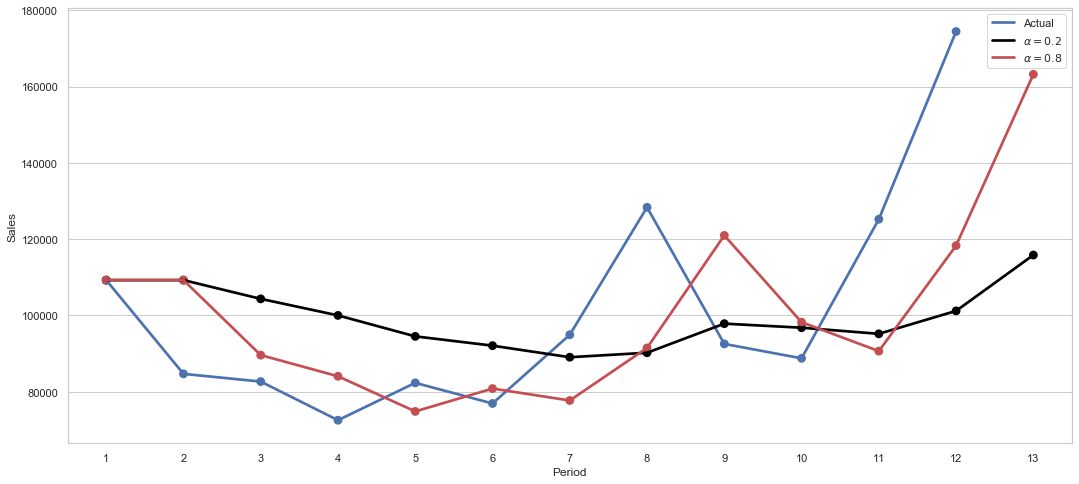

In [413]:
def exponential_smoothing(df, alpha):
    es_df = pd.DataFrame(columns=['Period','Sales'])
    es_df.loc[0] = [1, df['Sales'][0]]
    num_df = len(df)
    for m in range(0, num_df):
        sale_predict = alpha * df['Sales'][m] + (1-alpha) * es_df['Sales'][m]
        es_df.loc[m+1] = [m+2, sale_predict]
        
    es_df['Period'] = es_df['Period'].astype(int)
    return es_df

f, ax = plt.subplots(1, 1)
es_df_02 = exponential_smoothing(df_2013, 0.2)
es_df_08 = exponential_smoothing(df_2013, 0.8)
sns.pointplot(ax=ax, x='Period', y='Sales', data=df_2013, color='b')
sns.pointplot(ax=ax, x='Period', y='Sales', data=es_df_02, color='black')
sns.pointplot(ax=ax, x='Period', y='Sales', data=es_df_08, color='r')

ax.legend(handles=ax.lines[::len(df_2013)+2], labels=["Actual", r'$\alpha=0.2$', r"$\alpha=0.8$"])
plt.show()

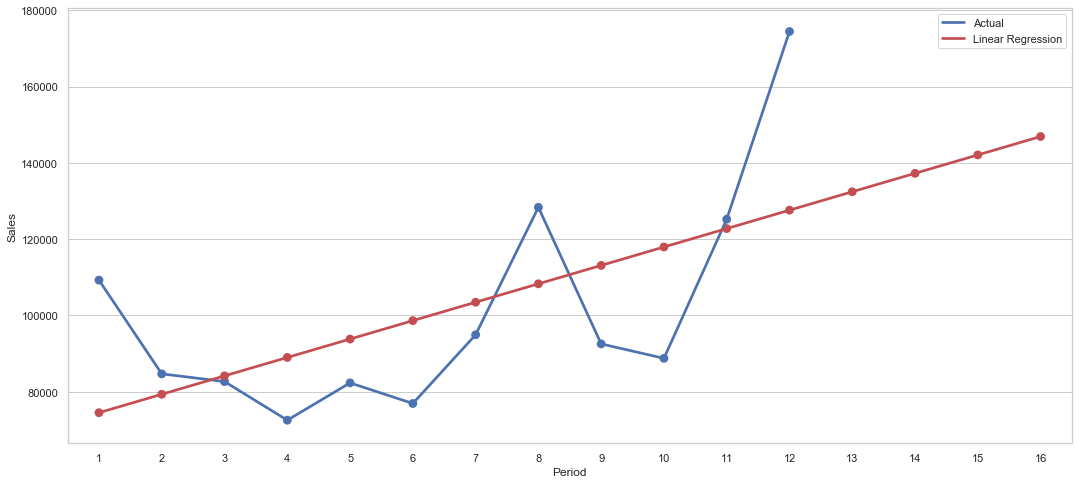

In [414]:
def linear_regression(df):
    linear_df = df.copy()
    linear_df['PeriodSales'] = linear_df['Period'] * linear_df['Sales'] 
    linear_df['Period_2'] = linear_df['Period'] * linear_df['Period']
    linear_df['Sales_2'] = linear_df['Sales'] * linear_df['Sales']
    linear_sum = linear_df.sum()
    linear_mean = linear_df.mean()
    
    b = (linear_sum['PeriodSales'] - len(df) * linear_mean['Period'] * linear_mean['Sales']) \
        / (linear_sum['Period_2']- len(df) * linear_mean['Period'] * linear_mean['Period'])
    a = linear_mean['Sales'] - b * linear_mean['Period']
    return a,b


a,b = linear_regression(df_2013)
linear_df = pd.DataFrame(columns=['Period','Sales'])
for m in range(1, 17):
    sale = a + b * m
    linear_df.loc[m-1] = [m,sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='Period', y='Sales', data=df_2013, color='b')
sns.pointplot(ax=ax, x='Period', y='Sales', data=linear_df, color='r')

ax.legend(handles=ax.lines[::len(df_2013)+2], labels=["Actual", "Linear Regression"])
plt.show()

/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RankWarning: Polyfit may be poorly conditioned


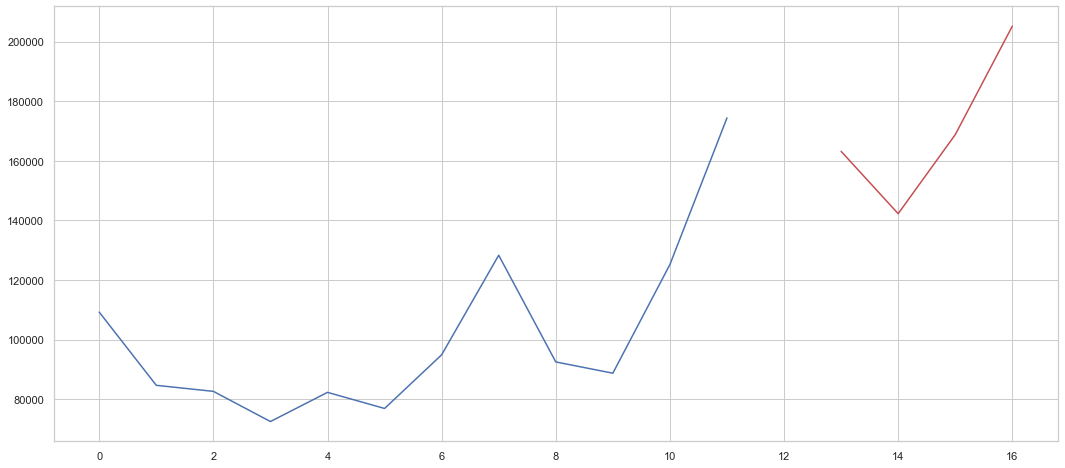

In [415]:
#season function
def get_season(row):
    if row['Period'] >= 5 and row['Period'] <= 8:
        return 'II'
    elif row['Period'] >= 9 and row['Period'] <= 12:
        return 'III'
    else:
        return 'I'
def get_seq(row):
    return row['Period']%4 and row['Period']%4 or 4

def predict_with_seasonality(df, months):
    new_df = df.copy()
    new_df['Season'] = new_df.apply(get_season, axis=1)
    new_df['Seq'] = new_df.apply(get_seq, axis=1)
    
    season_df = pd.DataFrame((new_df.pivot('Seq','Season')['Sales']).to_records())
    season_df.index = season_df['Seq']
    season_df = season_df.drop(['Seq'], axis=1)
    
    avg_df = season_df.apply(np.mean)
    
    seasonal_index_df = pd.DataFrame(columns=['I','II','III'])
    seasonal_index_df['I'] = season_df['I']/avg_df['I']
    seasonal_index_df['II'] = season_df['II']/avg_df['II']
    seasonal_index_df['III'] = season_df['III']/avg_df['III']
    seasonal_index_df['Avg'] = seasonal_index_df.mean(axis=1)
    
    season = np.array([1,2,3])
    avg_arr = np.array([avg_df['I'], avg_df['II'], avg_df['III']])
    fit = np.polyfit(season, avg_arr, 3)
    poly = np.poly1d(fit)
    average_predict = poly(4)
    forecast_df = pd.DataFrame(columns=['Period','Sales'])
    
    forecast_df['Sales'] = seasonal_index_df['Avg']*average_predict
    forecast_df['Period'] = months
#     forecast_df.index = forecast_df['Period']
    forecast_df.index = np.array(months) - 1
    return forecast_df

season_df = predict_with_seasonality(df_2013, [13,14,15,16])

f, ax = plt.subplots(1, 1)
plt.plot(df_2013['Sales'], c='b')
plt.plot(season_df['Period'], season_df['Sales'], c='r')
plt.show()

(<Figure size 900x612 with 6 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcac10351d0>,
       dtype=object))

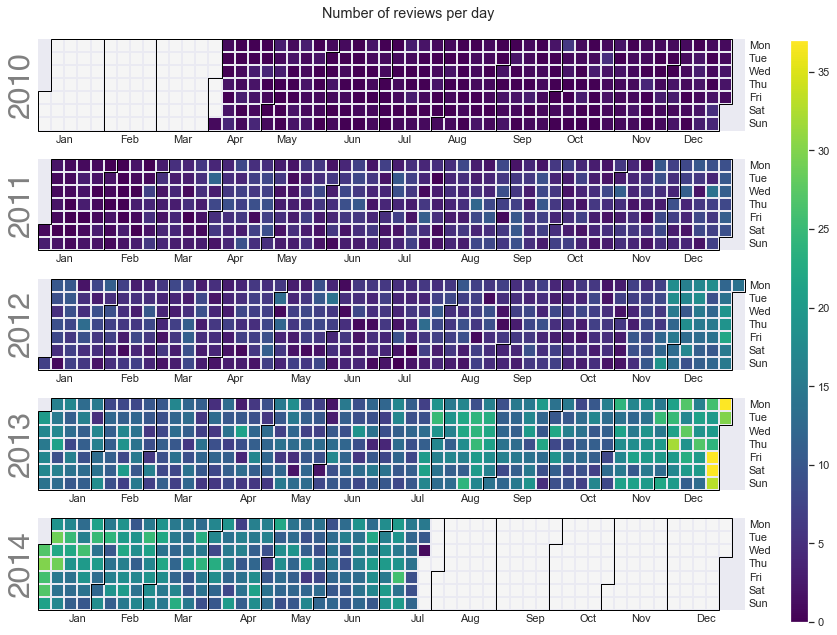

In [63]:
#### CREATING A CALPLOT
import calplot

df_tab_copy = df_tab.copy()
df_tab_copy=df_tab_copy[df_tab_copy["timeFormat"]>'2010-04-01']
df_tab_copy.set_index('timeFormat', inplace=True)
df_tab_copy.dropna()

#title = 'Sum of product prices reviewed in a certain day'
# calplot.calplot(df_tab_copy['price'], how='sum', suptitle = title, linewidth=1, edgecolor = 'black')

title = 'Number of reviews per day'
calplot.calplot(df_tab_copy['reviewerID'], how='count', suptitle = title, linewidth=1, edgecolor = 'black')

# source: https://github.com/tomkwok/calplot

In [64]:
### Average Daily Reviews Count by Day of the Week

# Create a column for the Day of the Week based off the date
df_tab['DayofWeek'] = df_tab['timeFormat'].dt.day_name()

# A list with our preferred day of the week order
dayofweek_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Group reviews by day of the week count and order correctly(Mon-Sun) with DayofWeek as ordered index
dayofweek_count = df_tab.groupby(df_tab['DayofWeek']).count().reindex(dayofweek_order) 
dayofweek_count 



,reviewerID,asin,reviewText,overall,summary,description,categories,title,price,salesRank,related,brand,timeFormat,sentiment,helpfulRatio,month_year
DayofWeek,,,,,,,,,,,,,,,,
Monday,1833,1833,1833,1833,1833,1829,1833,1833,1833,653,1833,1833,1833,1833,1268,1833
Tuesday,1883,1883,1883,1883,1883,1872,1883,1883,1883,634,1883,1883,1883,1883,1321,1883
Wednesday,1891,1891,1891,1891,1891,1885,1891,1891,1891,648,1891,1891,1891,1891,1347,1891
Thursday,1930,1930,1930,1930,1930,1920,1930,1930,1930,660,1930,1930,1930,1930,1373,1930
Friday,1806,1806,1806,1806,1806,1801,1806,1806,1806,633,1806,1806,1806,1806,1316,1806
Saturday,1652,1652,1652,1652,1652,1647,1652,1652,1652,587,1652,1652,1652,1652,1215,1652
Sunday,1616,1616,1616,1616,1616,1612,1616,1616,1616,592,1616,1616,1616,1616,1161,1616


In [65]:
# New dataframe with reviewerID and day of week as index
DayOfWeekGroupBy = pd.DataFrame(dayofweek_count['reviewerID'])
DayOfWeekGroupBy

,reviewerID
DayofWeek,
Monday,1833
Tuesday,1883
Wednesday,1891
Thursday,1930
Friday,1806
Saturday,1652
Sunday,1616


In [66]:
# New column for count how many unique dates per day of week
# Groupby DayofWeek and count unique Dates aka unique dates per DayofWeek (example: 241 mondays in the whole dataset)
DayOfWeekGroupBy['DayofWeekCount'] = df_tab.groupby('DayofWeek')['timeFormat'].nunique()
DayOfWeekGroupBy.head(7)

,reviewerID,DayofWeekCount
DayofWeek,,
Monday,1833,241
Tuesday,1883,239
Wednesday,1891,247
Thursday,1930,241
Friday,1806,244
Saturday,1652,231
Sunday,1616,239


In [67]:
# Getting the average reviews per dar of the week.
DayOfWeekGroupBy['AverageDailyReviews'] = round(DayOfWeekGroupBy['reviewerID'] / DayOfWeekGroupBy['DayofWeekCount'], 2)
DayOfWeekGroupBy

,reviewerID,DayofWeekCount,AverageDailyReviews
DayofWeek,,,
Monday,1833,241,7.61
Tuesday,1883,239,7.88
Wednesday,1891,247,7.66
Thursday,1930,241,8.01
Friday,1806,244,7.40
Saturday,1652,231,7.15
Sunday,1616,239,6.76


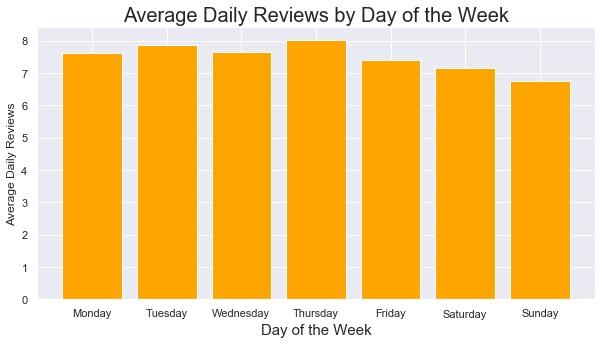

'From the plot we can see that reviews are very homogeneous during the week, with a slight less chance of\npeople making reviews during the weekend.'

In [68]:
# Average Daily Reviews by Day of the Week
# y axis 
y = DayOfWeekGroupBy['AverageDailyReviews']

# x axis is Day of the Week(our index that has been ordered Mon - Sun)
x = DayOfWeekGroupBy['reviewerID'].index

fig, ax = plt.subplots(figsize=(10,5))

ax.set_title("Average Daily Reviews by Day of the Week", size=20)
ax.set_xlabel('Day of the Week', size=15)
ax.set_ylabel('Average Daily Reviews', size=12)

plt.bar(x, y, color='orange')
plt.show()

'''From the plot we can see that reviews are very homogeneous during the week, with a slight less chance of
people making reviews during the weekend.'''

In [69]:
from pyecharts.charts import Pie
from pyecharts import options as opts
# pip install pyecharts -U --> run this line if you don't have the pyechart module installed


c = DayOfWeekGroupBy['reviewerID'].index.values.tolist() #Day of the Week(our index that has been ordered Mon - Sun)
d = DayOfWeekGroupBy['AverageDailyReviews'].values.tolist() # Average Daily Reviews by Day of the Week

#create the color_series for the rosechart
color_series = ['#802200','#B33000','#FF4500','#FAA327','#9ECB3C', 
                '#6DBC49','#37B44E']
# rosechart = Pie(init_opts=opts.InitOpts(width='1350px', height='750px'))
rosechart = Pie(init_opts=opts.InitOpts(width='1012px', height='562px'))
# set the color
rosechart.set_colors(color_series)
# add the data to the rosechart
rosechart.add("", [list(z) for z in zip(c, d)],
        radius=["20%", "95%"],  # 20% inside radius，95% ourside radius
        center=["30%", "60%"],   # center of the chart
        rosetype="area")
# set the global options for the chart
rosechart.set_global_opts(title_opts=opts.TitleOpts(title='Nightingale Rose Chart',
                                                    subtitle="Average Number of Reviews per Day of the Week"),
                                                    legend_opts=opts.LegendOpts(is_show=False),
                                                    toolbox_opts=opts.ToolboxOpts())
# set the series options
rosechart.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position="inside", 
                                                    font_size=12,formatter="{b}: {c}",
                                                    font_style="italic",font_weight="bold", 
                                                    font_family="Century"))

'''From the plot we can see that reviews are very homogeneous during the week, with a slight less chance of
people making reviews during the weekend.'''

rosechart.render_notebook()


# Source: https://python.plainenglish.io/make-a-beautiful-bar-chart-in-just-few-lines-in-python-5625ebc71c49

In [70]:
# Trying to predict the score based off textual analysis

#pip install vaderSentiment <--- run this line if you don't have vaderSentiment installed
import nltk
from nltk.classify import NaiveBayesClassifier
# nltk.download('subjectivity')
nltk.download('movie_reviews')
from nltk.corpus import subjectivity
from nltk.corpus import movie_reviews
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/gabrielamonteiro/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gabrielamonteiro/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

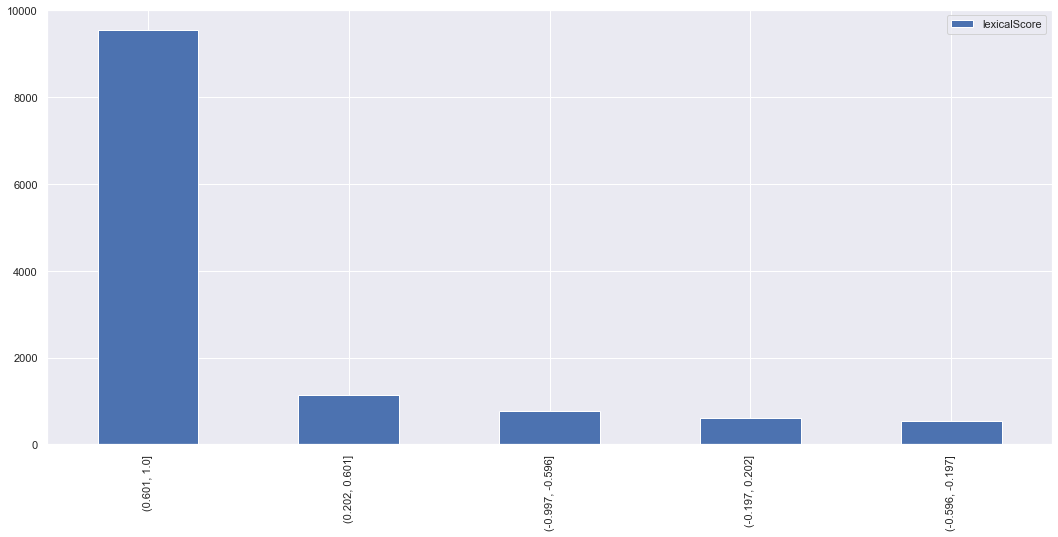

In [169]:
test = pd.DataFrame(text_ratings['lexicalScore'].value_counts(bins=5))
test.plot(kind='bar', stacked=True)
# plt.hist(text_ratings['lexicalScore'], bins =5)
# plt.show()

In [245]:
pd.DataFrame(text_ratings['lexicalScore'].value_counts(bins=5)).reset_index().sort_values(by='index',ascending=False)

,index,lexicalScore
0,"(0.601, 1.0]",9541
1,"(0.202, 0.601]",1131
3,"(-0.197, 0.202]",613
4,"(-0.596, -0.197]",542
2,"(-0.997, -0.596]",771


In [401]:
def lexicon_score_per_rating(rating):
    '''takes a rating as argument and returns a list with number of reviews with rating and within 5 ranges of lexicon
    scores.'''
    scores_list = (0.601, 0.202,-0.197,-0.596,-0.997)
    generated_list = []
    df = text_ratings.copy()

    for score in scores_list:
        count = df[(df['lexicalScore'] >= score) & (df['overall']==rating)].shape[0]
        generated_list.append(count)
        df.drop(df[(df['lexicalScore'] >= score) & (df['overall']==rating)].index, inplace=True)
    return generated_list[::-1]


In [ ]:
rat_5 = lexicon_score_per_rating(5)
rat_4 = lexicon_score_per_rating(4)
rat_3 = lexicon_score_per_rating(3)
rat_2 = lexicon_score_per_rating(2)
rat_1 = lexicon_score_per_rating(1)

In [286]:
rat_5

[5924, 557, 222, 134, 83]

In [287]:
rat_4

[2244, 219, 118, 88, 90]

In [288]:
rat_3

[703, 153, 104, 91, 124]

In [358]:
rat_3

[124, 91, 104, 153, 703]

In [289]:
rat_2

[362, 95, 69, 98, 173]

In [290]:
rat_1

[308, 107, 100, 131, 301]

Text(0.5, 1.0, 'Lexical Scores per Ratings')

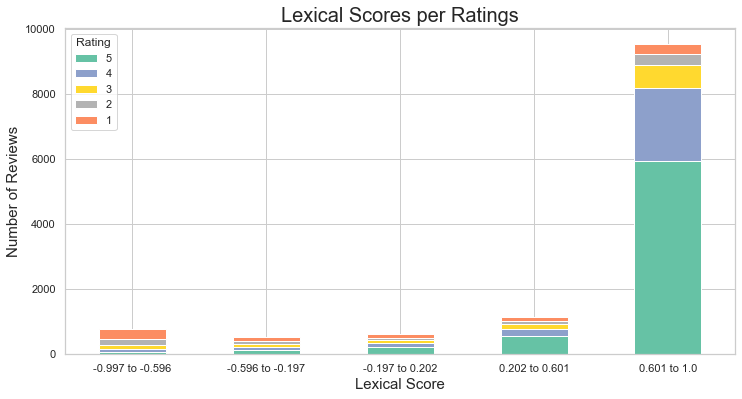

In [410]:
df = pd.DataFrame(columns=['Rating',
                           '-0.997 to -0.596', 
                           '-0.596 to -0.197',
                           '-0.197 to 0.202', 
                           '0.202 to 0.601',
                           '0.601 to 1.0'], 
                   data=[['5',83, 134, 222, 557, 5924],
                        ['4',90, 88, 118, 219, 2244],
                        ['3',124, 91, 104, 153, 703],
                        ['2',173, 98, 69, 95, 362],
                        ['1',301, 131, 100, 107, 308]])

sns.set(style="whitegrid")

from matplotlib.colors import ListedColormap

df.set_index('Rating').T.plot(kind='bar', stacked=True,colormap=ListedColormap(sns.color_palette("Set2", 10)), 
                                                                                                figsize=(12,6))
plt.xticks(rotation=0)
plt.xlabel('Lexical Score', size=15)
plt.ylabel('Number of Reviews', size=15)
plt.title('Lexical Scores per Ratings', size=20)

#source: https://stackoverflow.com/questions/47138271/how-to-create-a-stacked-bar-chart-for-my-dataframe-using-seaborn

In [ ]:
# plt.figure(figsize=(11, 6))
# bins = [1, 0.202,-0.197,-0.596,-0.997]

# rat_5 = lexicon_score_per_rating(5)
# rat_4 = lexicon_score_per_rating(4)
# rat_3 = lexicon_score_per_rating(3)
# rat_2 = lexicon_score_per_rating(2)
# rat_1 = lexicon_score_per_rating(1)

# plt.plot(bins,rat_5,color='mediumpurple', label='5 stars', linewidth=3)
# plt.plot(bins,rat_4,color='olivedrab', label='4 stars', linewidth=3)
# plt.plot(bins,rat_3,color='lightcoral', label='3 stars', linewidth=3)
# plt.plot(bins,rat_2,color='navy', label='2 stars', linewidth=3)
# plt.plot(bins,rat_1,color='orange', label='1 star', linewidth=3)

# plt.xlabel('Lexical Score')
# plt.ylabel('Number of Reviews')
# plt.title('Ratings by Lexical Score')
# plt.legend()
# plt.show()

In [146]:
# 1. Create a table with columns reviewText, overall
text_ratings = df_tab[['reviewText', 'overall']]
# text_ratings[text_ratings['reviewText'] == ''] # ---> 13 rows don't have a review text.
text_ratings = text_ratings[text_ratings['reviewText'] != ''] # reassigning the dataframe only with rows that have reviews.

# 2. Generate a lexical score for each reviewText and put it in a list
lexicalScoreList = []
sid = SentimentIntensityAnalyzer()
for doc in text_ratings['reviewText']:
    ss = sid.polarity_scores(doc)
    lexicalScoreList.append(ss['compound'])

# 3. Create a new column called lexicalScore
text_ratings['lexicalScore'] = lexicalScoreList

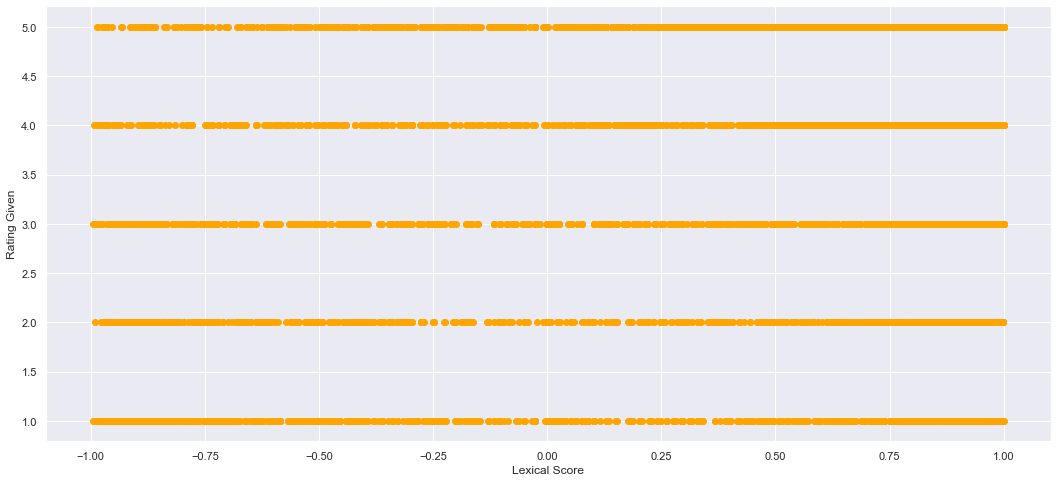

In [147]:
# Plot
plt.scatter(text_ratings['lexicalScore'], text_ratings['overall'], color='orange')
plt.ylabel('Rating Given')
plt.xlabel('Lexical Score')
plt.show()



In [151]:
# By the plot we can see that it doesn't matter what rating a user gave, the probability of receiving any 
# of the lexicon scores seems to be the same. Why has it happened? 

# As we can see bellow, one user gave 5 star, but their lexical score (compound) was -0.3595
# Another user rated a product as 1, but received 0.9794 as a lexical score.
# This situation might have happened with many other users.
text_ratings.tail()

,reviewText,overall,lexicalScore
1688824,I spent a lot of time researching the right ta...,5.0,0.8977
1688825,Samsung's Tab S is a strong rival to the iPad ...,3.0,0.2846
1688826,I question every review over 3 Stars on the Ga...,1.0,0.9794
1688827,Boot up time about 30 seconds. Quick and snapp...,5.0,-0.3595
1688828,"With the Samsung Galaxy Tab S 10.5, Samsung fi...",4.0,0.9712


In [74]:
text_ratings.loc[1688827 , 'reviewText']

'Boot up time about 30 seconds. Quick and snappy. Incredible looking screen! I bought a keyboard and mouse to go along with it. This is big enough for me to replace a laptop and other much slower systems. I replaced touchwiz with Nova Launcher and can place all my icons on one home screen. Some difficulties in connecting an external hd.'

In [75]:
sentiment = SentimentIntensityAnalyzer()
sentiment.polarity_scores('''Boot up time about 30 seconds. Quick and snappy. Incredible looking screen! 
                          I bought a keyboard and mouse to go along with it. This is big enough for me to 
                          replace a laptop and other much slower systems. I replaced touchwiz with Nova 
                          Launcher and can place all my icons on one home screen. Some difficulties in 
                          connecting an external hd.''')

# OBS: This user gave a rating of 5 stars to this product, however, his compound is -0.3595
# This might have happened because he used words such as "replace", "slower", "difficulties".

{'neg': 0.043, 'neu': 0.957, 'pos': 0.0, 'compound': -0.3595}

In [76]:
text_ratings.loc[1688826, 'reviewText']

"I question every review over 3 Stars on the Galaxy Tab S as either premature or paid reviews because my experience can no way be isolated. I had my Tab S for 9 days and in that time I experienced why this tablet was years away from even a slight comparison to the iPad. To be clear, I am NOT a fan of Apple products.First, the screen is beautiful. The colors on images and videos pop right out. It's an eye catching experience just looking at the technology of an Amoled screen. Size and weight are also perfect but that is where the positive attributes end.First, I travel quite a bit and this tablet was for movies on the plane, reading books and magazines and catching up on email. You cannot access or play your Amazon Prime library as Amazon only supports Amazon tablets for downloading and playing movies. At least on the iPad you can play your Prime movies. Not on the Tab S, you are just dead in the water. You can however access Flickster movies and save them to Dropbox, which works well.A

In [77]:
sentiment.polarity_scores('''I question every review over 3 Stars on the Galaxy Tab S as either premature or 
paid reviews because my experience can no way be isolated. I had my Tab S for 9 days and in that time I 
experienced why this tablet was years away from even a slight comparison to the iPad. To be clear, I am NOT 
a fan of Apple products.First, the screen is beautiful. The colors on images and videos pop right out. It's 
an eye catching experience just looking at the technology of an Amoled screen. Size and weight are also perfect 
but that is where the positive attributes end.First, I travel quite a bit and this tablet was for movies on the 
plane, reading books and magazines and catching up on email. You cannot access or play your Amazon Prime library 
as Amazon only supports Amazon tablets for downloading and playing movies. At least on the iPad you can play your 
Prime movies. Not on the Tab S, you are just dead in the water. You can however access Flickster movies and save 
them to Dropbox, which works well.After viewing movies, I noticed images and videos were blurred from frame to frame 
and the darks were very distorted. I tried changing the display setting but nothing worked. When reading web pages 
or books and magazines on the first few pages would be in view and others were blurry. Nothing seemed to correct 
this either. I brought my Tab S into Best Buy they were aware of this issue and had seen it on a few returns. 
So in other words, nothing you can do to correct it.The camera is great and pics are crisp and clear. For me, 
a camera on a tablet is a bit useless but I was impressed with the clarity of images.Now to the big issue which 
caused me to return my Galaxy Tab S. Latency and Lag. If you are clicking on an app, using the back button or 
just navigating from task to task, you will find yourself waiting for the tablet to catch up to you. For has 
powerful as this thing is in terms of Specs, it is slow and locks up quite a bit. It is frustrating because it 
happens all the time and is not isolated from one area to another. This was the back breaker for me. Not to mention 
no access to Outlook for email when the Samsung email client will not sync Outlook sub-folders and is outdated. 
People told me to download 3rd party apps to make email work. That makes no sense. It works on the iPad, Surface, 
Google and Asus tablets without a 3rd party app so why is Samsung so far behind in technology?I almost forgot, 
Battery life is 6 to 7 hours in real time use. Where they are coming up with 9 to 10 is amazing.All and all, the 
Galaxy Tab S is a huge disappointment. Sure the screen is nice but over a short period of time you start to realize 
that everything else is below par. I would not recommend this tablet to anyone especially with the huge price point.''')

# OBS: this user gave 1 star rating, but the compound shows 0.9794.
# This could be explained because the user was complimenting another product, which he believes to be better than 
# the one that he bought.

{'neg': 0.082, 'neu': 0.792, 'pos': 0.125, 'compound': 0.9794}

In [78]:
#pip install altair  <--- run this line if you don't have altair installed
import altair as alt

In [125]:
sales = df_tab.loc[df_tab['salesRank'].isna() != True]

In [126]:
# the salesRank column has a dictionary and we want to grab only the number of the dictionary.
list1 = []
for dic in sales['salesRank']:
    if len(dic.values()) == 0:
        list1.append(0)
    else:
        list1.append(list(dic.values())[0])

sales['newSalesRank'] = list1

/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [129]:
rank_df = sales[['brand', 'newSalesRank', 'timeFormat']]
brands = top_10_brands['brand'].values
rank_df = rank_df.loc[rank_df['brand'].isin(brands)]
rank_df = rank_df.loc[rank_df['timeFormat'] > '2013']
rank_df

,brand,newSalesRank,timeFormat
123755,Wacom,0,2013-04-12
123759,Wacom,0,2013-02-24
233229,Wacom,0,2014-02-06
233233,Wacom,0,2014-04-16
1138905,Wacom,0,2013-06-23
...,...,...,...
1688824,Samsung,224,2014-06-28
1688825,Samsung,224,2014-07-20
1688826,Samsung,224,2014-07-05
1688827,Samsung,224,2014-07-11


In [131]:
# Group by brand and date
# rank_df.groupby(['brand','timeFormat', as_index=False).agg({"newSalesRank": "mean"})

# rank_df = pd.DataFrame(rank_df.groupby(['brand', 'timeFormat'])['newSalesRank'].mean()).reset_index()

In [132]:
alt.Chart(rank_df).mark_line().encode(
                                        x="timeFormat",
                                        y="newSalesRank",
                                        color="brand").properties(height=300, width=500,
)


# Adding some interactivity to our plot

selection = alt.selection_multi(fields=["brand"], bind="legend")
alt.Chart(rank_df).mark_line().encode(
   x="timeFormat",
   y="newSalesRank",
   color="brand",
   opacity=alt.condition(selection, alt.value(1), alt.value(0.1))
).properties(
   height=300, width=500
).add_selection(
   selection
)

# Interactivity by hovering the mouse over the lines in the plot.

hover = alt.selection(
   type="single", on="mouseover", fields=["brand"], nearest=True
)

# line plot
lineplot = alt.Chart(rank_df,title='Average Sales Ranking by Brand').mark_line().encode(
   x=alt.X('yearmonth(timeFormat):T', axis=alt.Axis(title='Period')),
   y=alt.Y('mean(newSalesRank):Q', axis=alt.Axis(title='Average Rank')),
   color=alt.Color('brand', legend=alt.Legend(title="Brand Name")),
    

)
# nearest point
point = lineplot.mark_circle().encode(
   opacity=alt.value(0)
).add_selection(hover)
# highlight
singleline = lineplot.mark_line().encode(
   size=alt.condition(~hover, alt.value(0.5), alt.value(3))

)

point + singleline

# source 1: https://towardsdatascience.com/making-interactive-line-plots-with-python-pandas-and-altair-7ee1d109e3dd
# source 2: https://altair-viz.github.io/user_guide/customization.html
# source 3: https://altair-viz.github.io/user_guide/transform/timeunit.html#user-guide-timeunit-transform

alt.LayerChart(...)